In [1]:
from sgps import StretchedGridPoisson
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def stretchedGrid(n, y0, ylast, gridType):
    """
    Given an "n" length stretched grid of type
    given by the "gridType" variable.
    
    The first element, "y0", and the last element,
    "ylast," are used to find the coefficients of
    one of the following types of stretched grid.
    
    "gridType" is one of the following
    strings, and the types are described below:
    
    "lin": a linear grid with endpoints at y0 and ylast
    
    "quad": a quadratic centered on the y axis
    and with a y intercept of y0
    
    "exp": an exponential with a y intercept of y0
    """
    
    i = np.arange(0,n)
    
    if gridType == "lin":
        return (ylast-y0)/(n-1)*i+y0
    elif gridType == "quad":
        return (ylast-y0)/np.square((n-1))*np.square(i)+y0
    elif gridType == "exp":
        return y0*np.exp( i*np.log(ylast/y0)/(n-1) )
    else:
        print("Incorrect gridType")
    

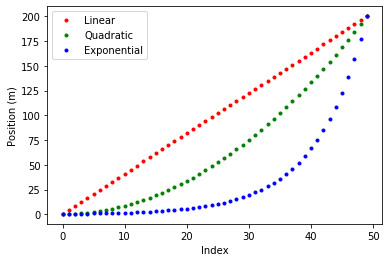

In [3]:
# Set up to test the StretchedGridPoisson class using
# the long parallel plates problem with 0 forcing

nShort, short0, lastShort = 50, .50, 200
delShort = lastShort-short0
nLong, long0, lastLong = 50, 50, 20000
delLong = lastLong-long0

# Create different grid types for the "short" axis
# 100 elements starting at .50m and ending at 200m
lin = stretchedGrid(nShort, short0, lastShort,"lin")
quad = stretchedGrid(nShort, short0, lastShort,"quad")
exp = stretchedGrid(nShort, short0, lastShort,"exp")

# Create a linear grid for the "long" axes, which
# spans a distance 100 times greater than the "short"
# axis
# 100 elements
longLin = stretchedGrid(nShort, long0, lastLong,"lin")

plt.plot(lin,'r.')
plt.plot(quad,'g.')
plt.plot(exp,'b.')

plt.xlabel('Index')
plt.ylabel('Position (m)')
plt.legend(['Linear', 'Quadratic', 'Exponential'])

plt.savefig("stretchedGrid.png")

In [55]:
numOfIt = 1000

-------------------------------------------------------------
# Test Dirichlet Conditions
-------------------------------------------------------------

### Short z

In [5]:
# Parallel plate problem with the z axis being the
# "short" axis
# Linear grid on long axes

filename = "./output/dirichlet/parPlates_{1}_{0}Iter.png".format(numOfIt,"shortZ")
print(filename)

phi = np.zeros((nLong,nLong,nShort))
f = phi.copy()
phiTop = 100
topBoundary = phiTop*np.ones((nLong,nLong))

exactSoln = phiTop/delShort * lin

sgpsLin = StretchedGridPoisson(longLin,longLin,lin,phi,f)
sgpsLin.setDirichlet(topBoundary,"top")
sgpsLin.solvePoisson(numOfIt)

sgpsQuad = StretchedGridPoisson(longLin,longLin,quad,phi,f)
sgpsQuad.setDirichlet(topBoundary,"top")
sgpsQuad.solvePoisson(numOfIt)

sgpsExp = StretchedGridPoisson(longLin,longLin,exp,phi,f)
sgpsExp.setDirichlet(topBoundary,"top")
sgpsExp.solvePoisson(numOfIt)

./output/dirichlet/parPlates_shortZ_1000Iter.png
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 


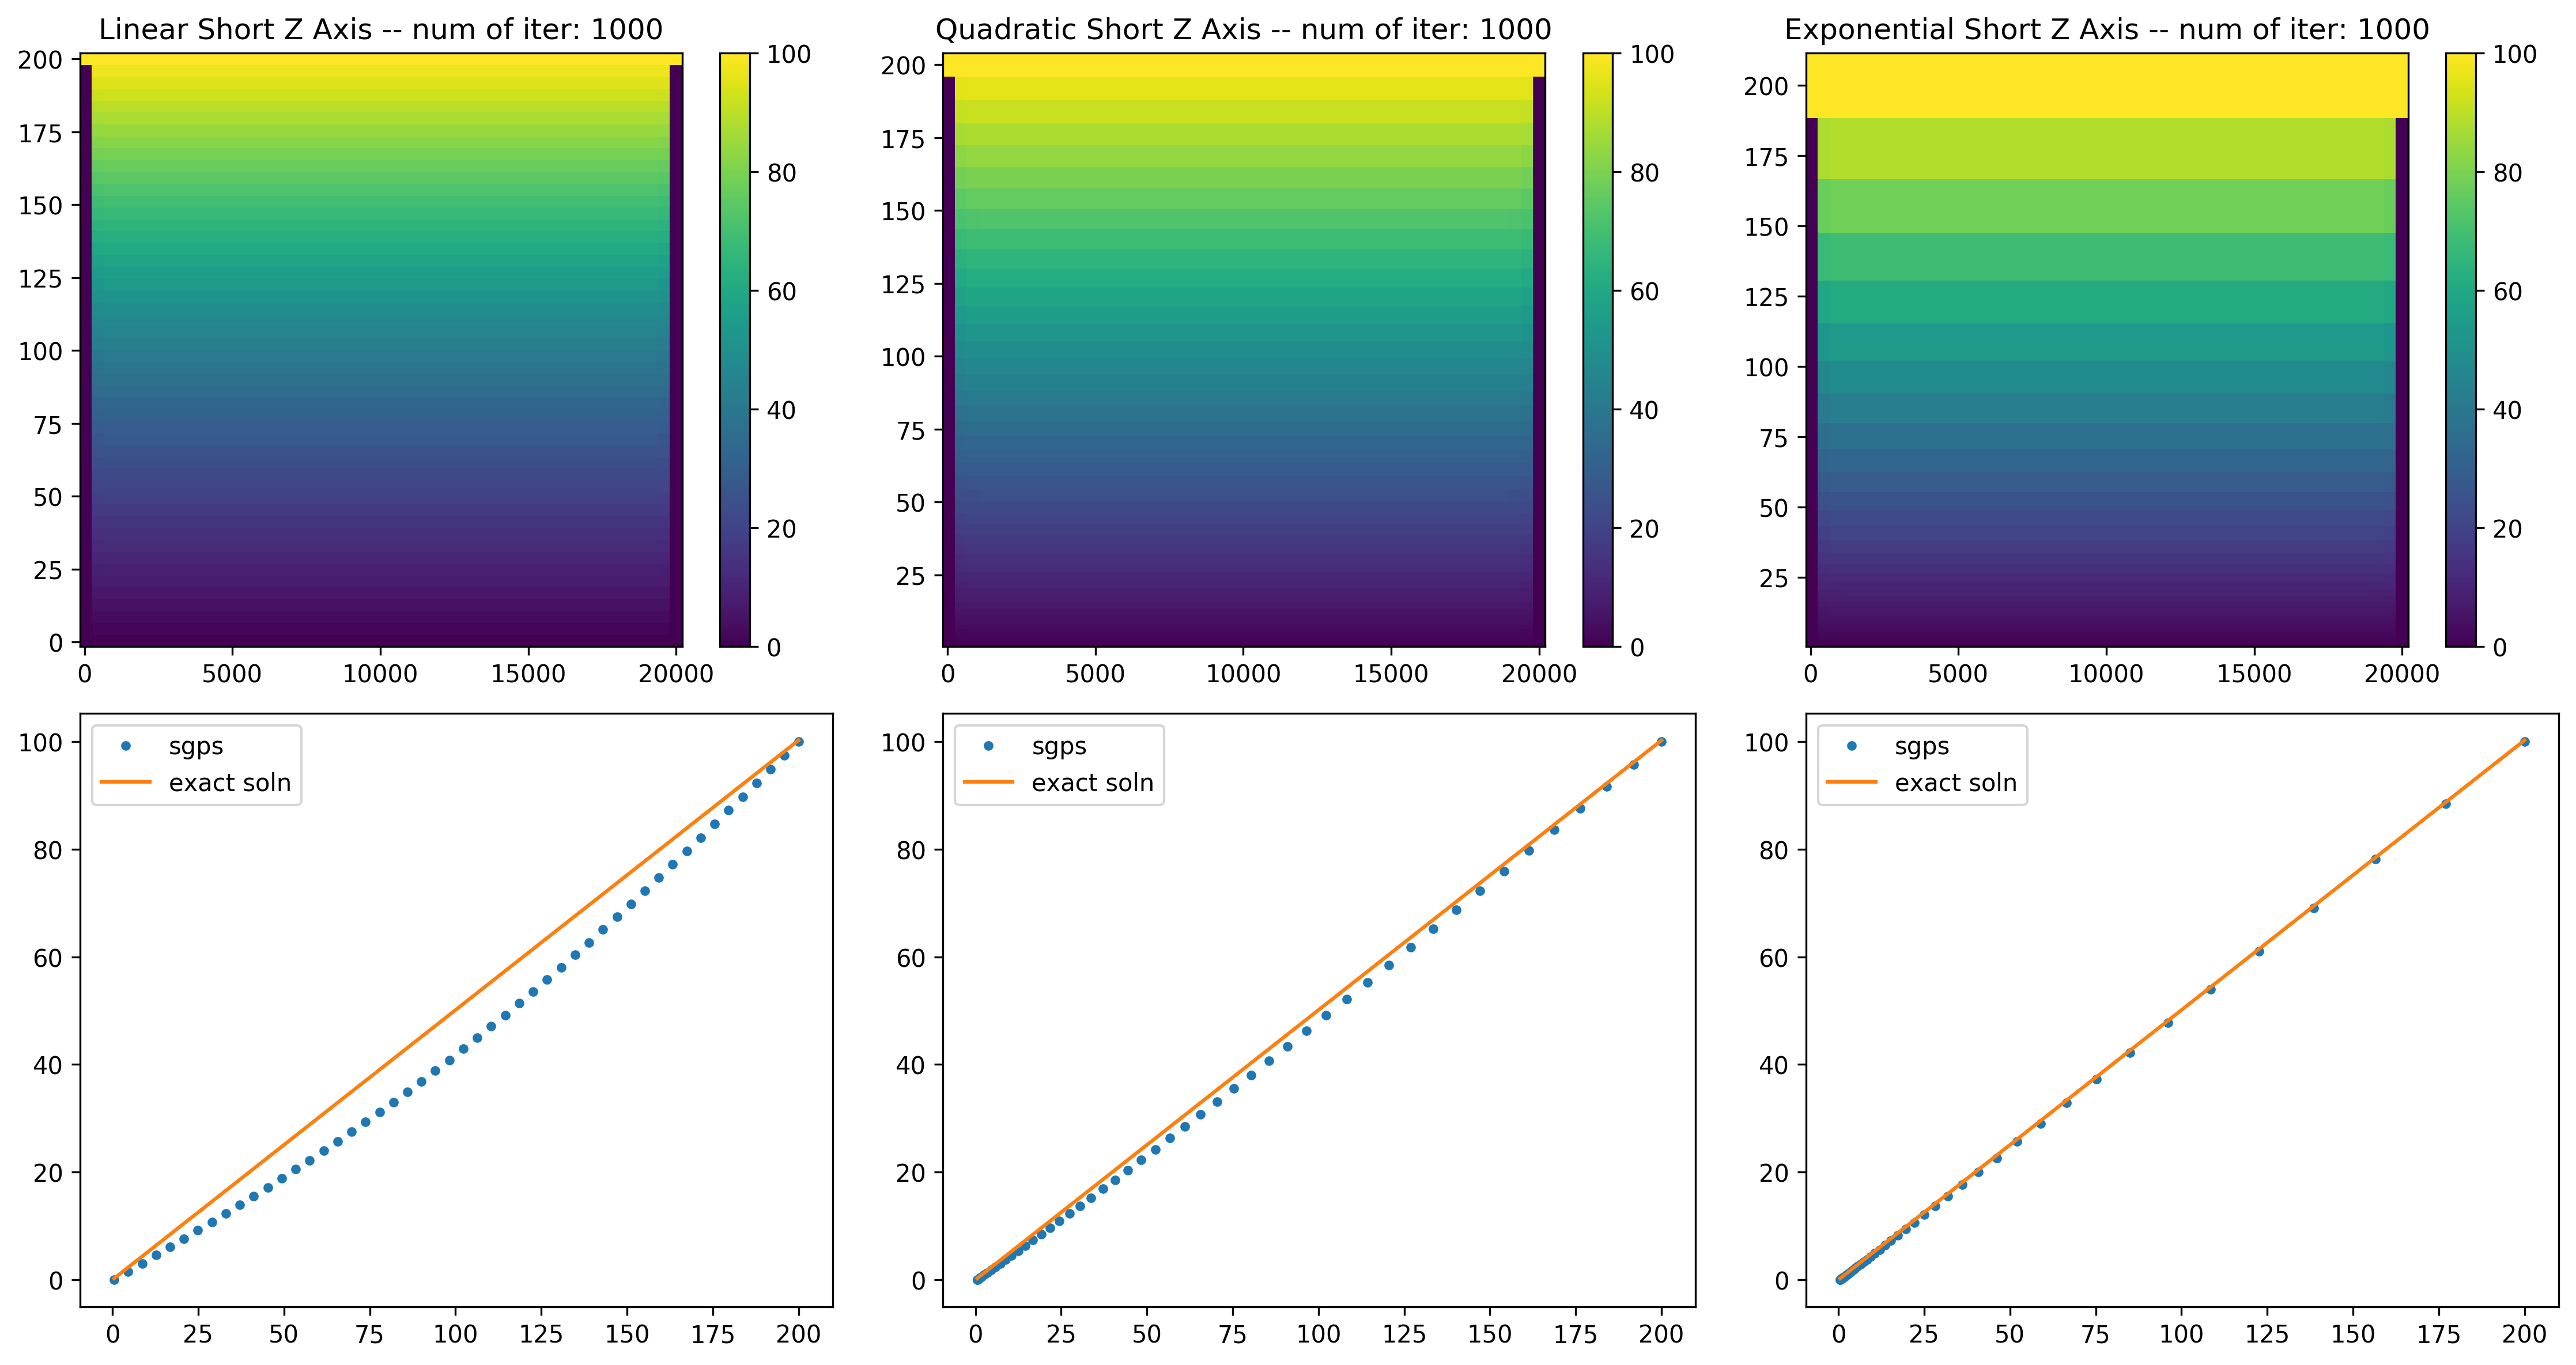

In [6]:
fig = plt.figure(figsize=(15,8),dpi=300)
ax = fig.add_subplot(2,3,1)
im = ax.pcolormesh(sgpsLin.yEdge,sgpsLin.zEdge,np.transpose(sgpsLin.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Linear Short Z Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,4)
ax.plot(sgpsLin.z,sgpsLin.soln[np.int(nLong/2),np.int(nLong/2),:],'.')
ax.plot(sgpsLin.z,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,2)
im = ax.pcolormesh(sgpsQuad.yEdge,sgpsQuad.zEdge,np.transpose(sgpsQuad.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Quadratic Short Z Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,5)
ax.plot(sgpsQuad.z,sgpsQuad.soln[np.int(nLong/2),np.int(nLong/2),:],'.')
ax.plot(sgpsLin.z,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,3)
im = ax.pcolormesh(sgpsExp.yEdge,sgpsExp.zEdge,np.transpose(sgpsExp.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Exponential Short Z Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,6)
ax.plot(sgpsExp.z,sgpsExp.soln[np.int(nLong/2),np.int(nLong/2),:],'.')
ax.plot(sgpsLin.z,exactSoln)
ax.legend(["sgps","exact soln"])

plt.tight_layout()

fig.savefig(filename)

### Short y

In [7]:
# Parallel plate problem with the y axis being the
# "short" axis
# Linear grid on long axes

filename = "./output/dirichlet/parPlates_{1}_{0}Iter.png".format(numOfIt,"shortY")
print(filename)

phi = np.zeros((nLong,nShort,nLong))
f = phi.copy()
phiBack = 100
backBoundary = phiBack*np.ones((nLong,nLong))

exactSoln = phiBack/delShort * lin

sgpsLin = StretchedGridPoisson(longLin,lin,longLin,phi,f)
sgpsLin.setDirichlet(backBoundary,"back")
sgpsLin.solvePoisson(numOfIt)

sgpsQuad = StretchedGridPoisson(longLin,quad,longLin,phi,f)
sgpsQuad.setDirichlet(backBoundary,"back")
sgpsQuad.solvePoisson(numOfIt)

sgpsExp = StretchedGridPoisson(longLin,exp,longLin,phi,f)
sgpsExp.setDirichlet(backBoundary,"back")
sgpsExp.solvePoisson(numOfIt)

./output/dirichlet/parPlates_shortY_1000Iter.png
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 


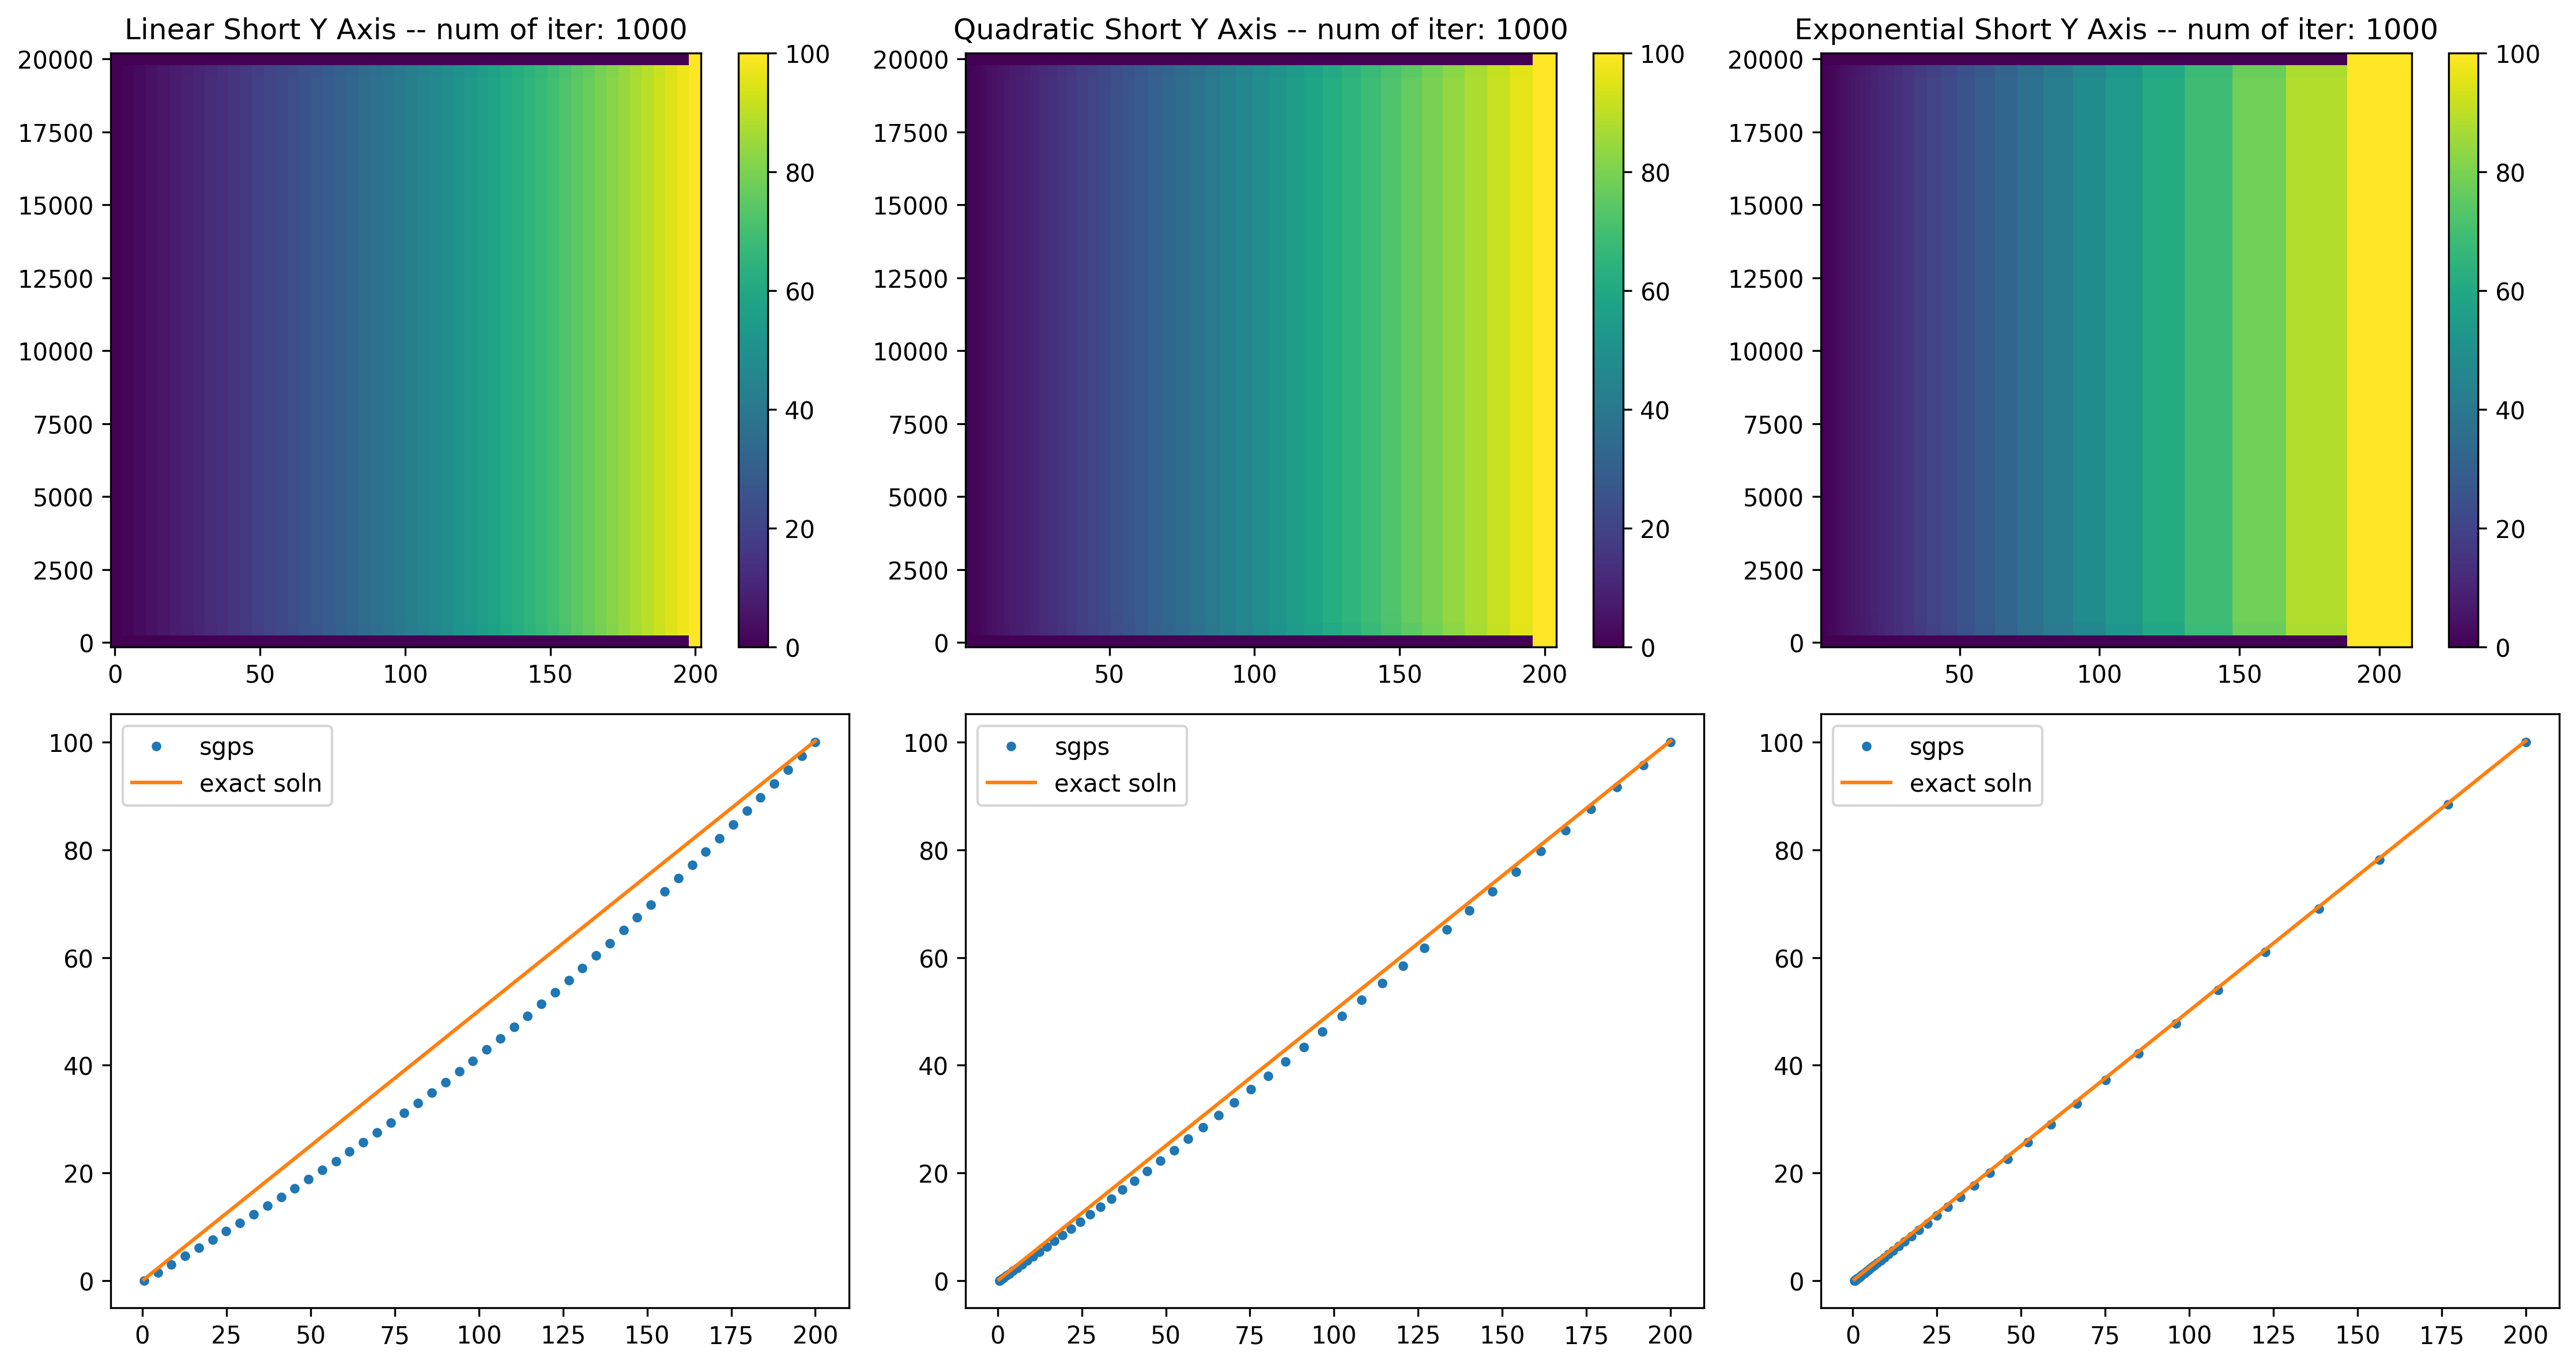

In [8]:
fig = plt.figure(figsize=(15,8),dpi=300)
ax = fig.add_subplot(2,3,1)
im = ax.pcolormesh(sgpsLin.yEdge,sgpsLin.zEdge,np.transpose(sgpsLin.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Linear Short Y Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,4)
ax.plot(sgpsLin.y,sgpsLin.soln[np.int(nLong/2),:,np.int(nLong/2)],'.')
ax.plot(sgpsLin.y,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,2)
im = ax.pcolormesh(sgpsQuad.yEdge,sgpsQuad.zEdge,np.transpose(sgpsQuad.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Quadratic Short Y Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,5)
ax.plot(sgpsQuad.y,sgpsQuad.soln[np.int(nLong/2),:,np.int(nLong/2)],'.')
ax.plot(sgpsLin.y,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,3)
im = ax.pcolormesh(sgpsExp.yEdge,sgpsExp.zEdge,np.transpose(sgpsExp.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Exponential Short Y Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,6)
ax.plot(sgpsExp.y,sgpsExp.soln[np.int(nLong/2),:,np.int(nLong/2)],'.')
ax.plot(sgpsLin.y,exactSoln)
ax.legend(["sgps","exact soln"])

plt.tight_layout()

fig.savefig(filename)

### Short x

In [9]:
# Parallel plate problem with the x axis being the
# "short" axis
# Linear grid on long axes

filename = "./output/dirichlet/parPlates_{1}_{0}Iter.png".format(numOfIt,"shortX")
print(filename)

phi = np.zeros((nShort,nLong,nLong))
f = phi.copy()
phiRight = 100
rightBoundary = phiRight*np.ones((nLong,nLong))

exactSoln = phiRight/delShort * lin

sgpsLin = StretchedGridPoisson(lin,longLin,longLin,phi,f)
sgpsLin.setDirichlet(rightBoundary,"right")
sgpsLin.solvePoisson(numOfIt)

sgpsQuad = StretchedGridPoisson(quad,longLin,longLin,phi,f)
sgpsQuad.setDirichlet(rightBoundary,"right")
sgpsQuad.solvePoisson(numOfIt)

sgpsExp = StretchedGridPoisson(exp,longLin,longLin,phi,f)
sgpsExp.setDirichlet(rightBoundary,"right")
sgpsExp.solvePoisson(numOfIt)

./output/dirichlet/parPlates_shortX_1000Iter.png
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 


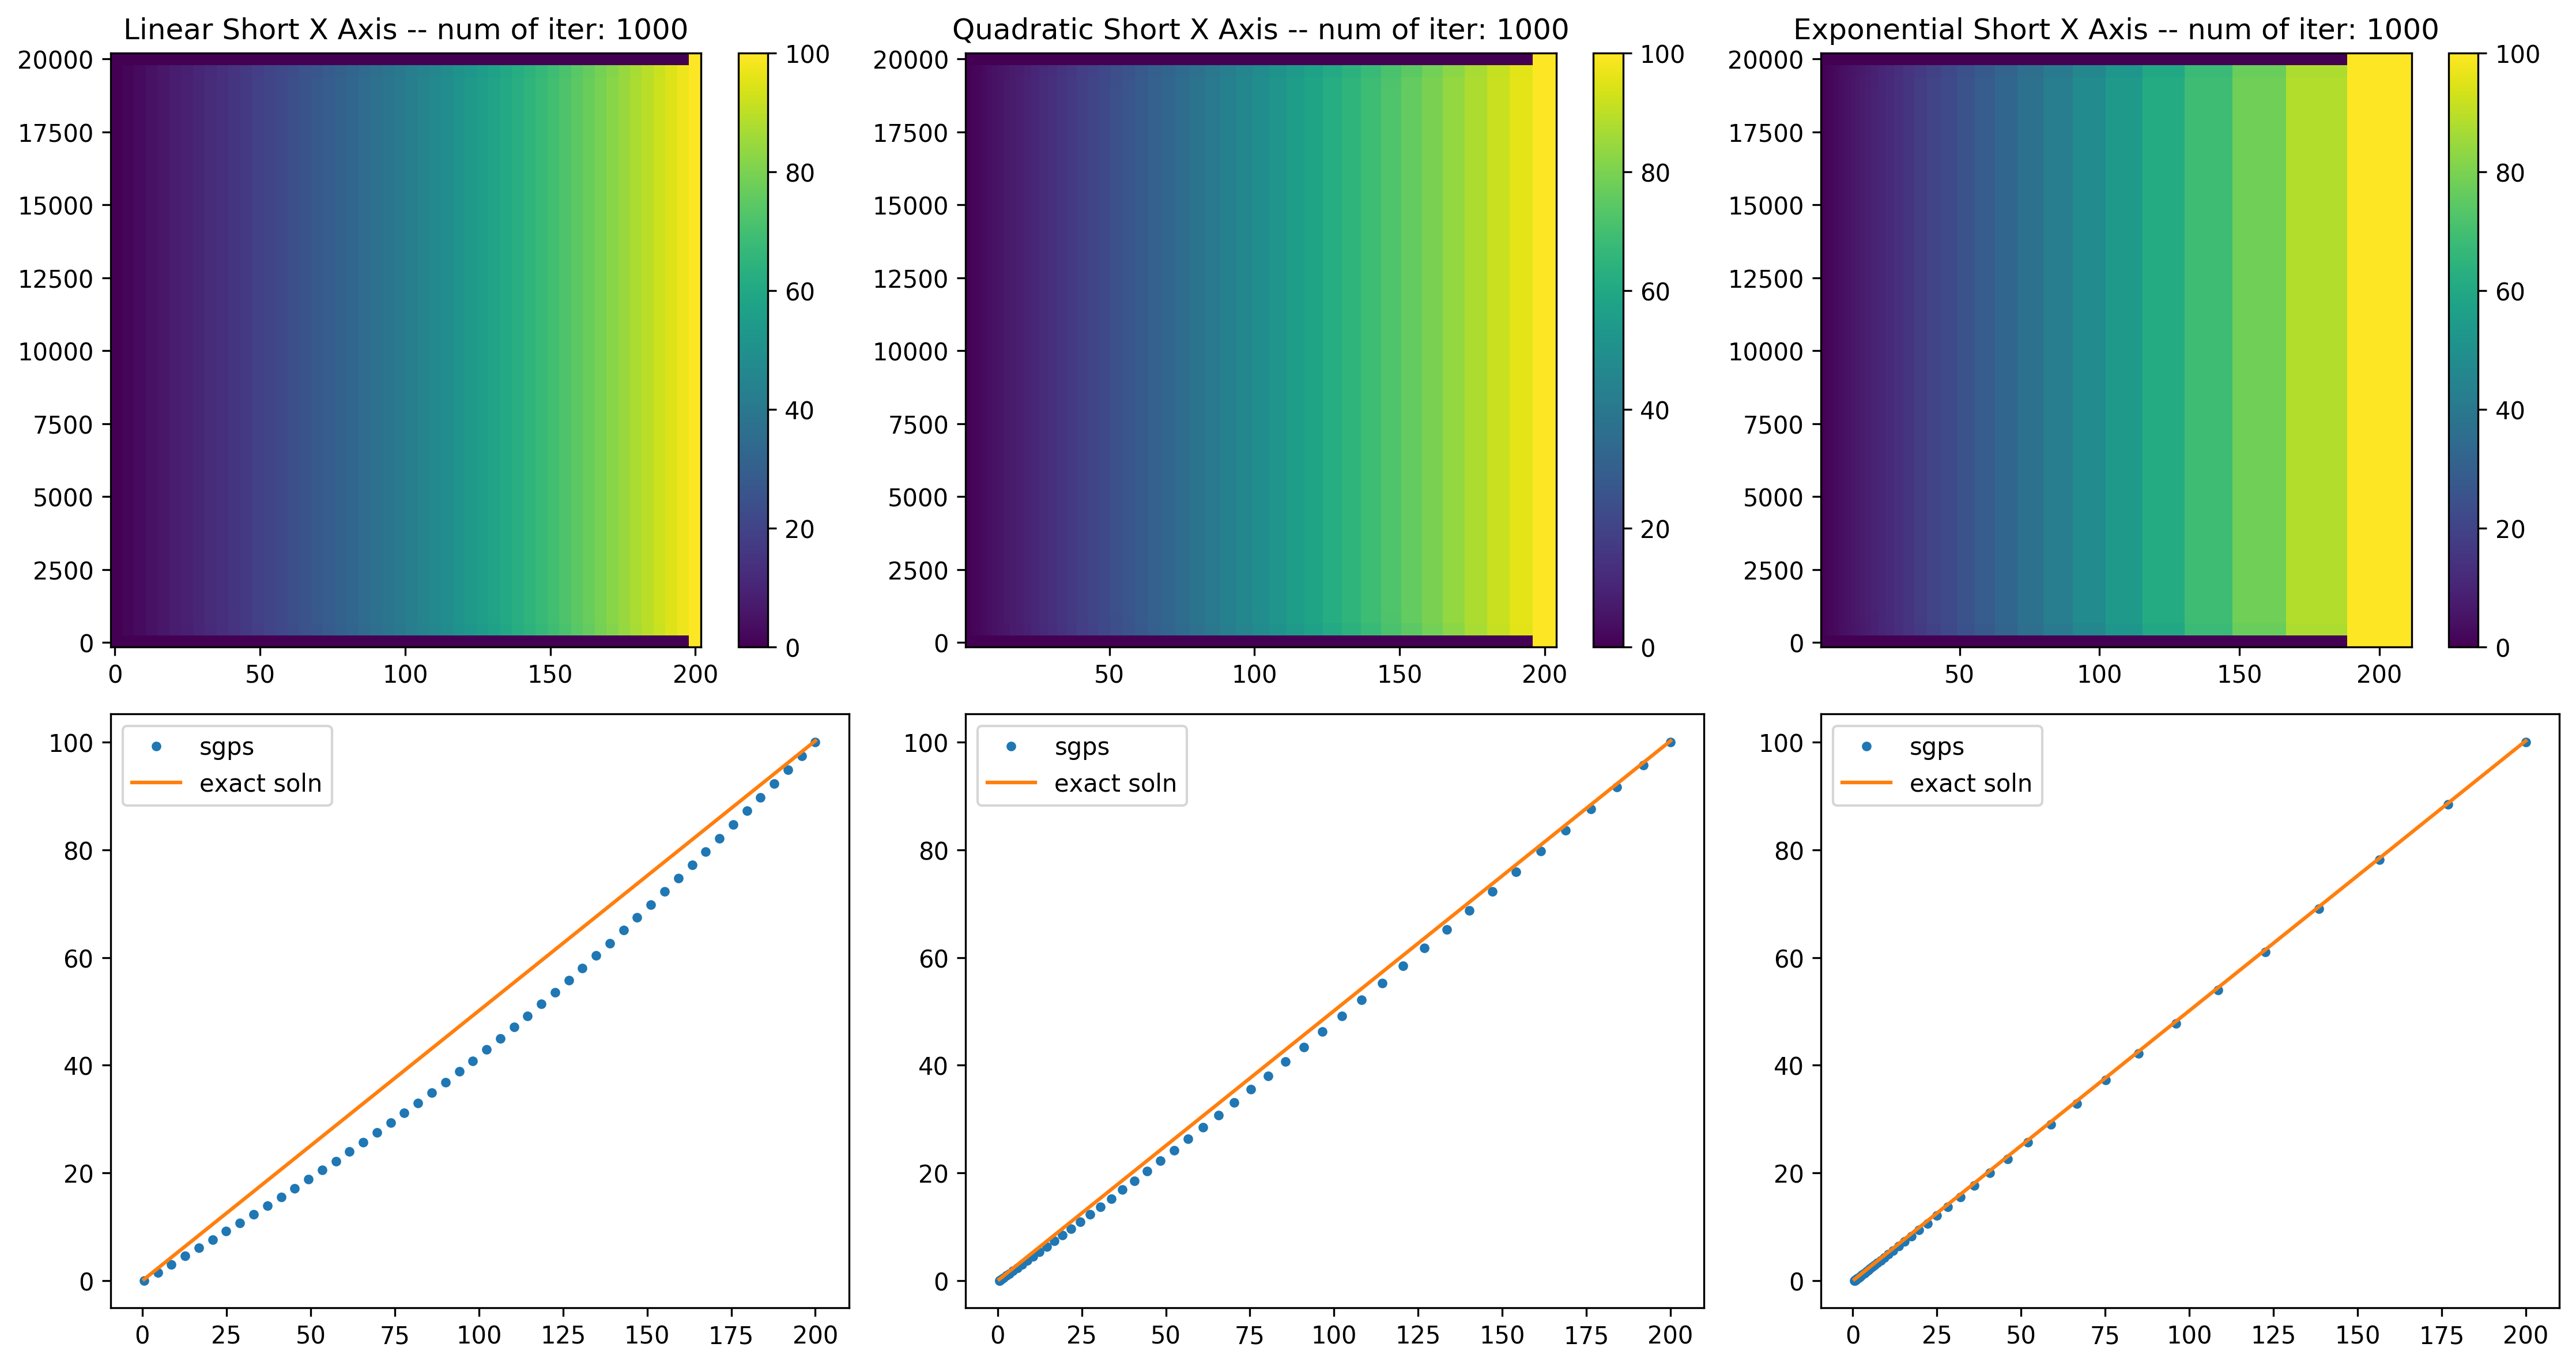

In [10]:
fig = plt.figure(figsize=(15,8),dpi=300)
ax = fig.add_subplot(2,3,1)
im = ax.pcolormesh(sgpsLin.xEdge,sgpsLin.zEdge,np.transpose(sgpsLin.soln[:,np.int(nLong/2),:]))
cb = plt.colorbar(im)
ax.set_title("Linear Short X Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,4)
ax.plot(sgpsLin.x,sgpsLin.soln[:,np.int(nLong/2),np.int(nLong/2)],'.')
ax.plot(sgpsLin.x,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,2)
im = ax.pcolormesh(sgpsQuad.xEdge,sgpsQuad.zEdge,np.transpose(sgpsQuad.soln[:,np.int(nLong/2),:]))
cb = plt.colorbar(im)
ax.set_title("Quadratic Short X Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,5)
ax.plot(sgpsQuad.x,sgpsQuad.soln[:,np.int(nLong/2),np.int(nLong/2)],'.')
ax.plot(sgpsLin.x,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,3)
im = ax.pcolormesh(sgpsExp.xEdge,sgpsExp.zEdge,np.transpose(sgpsExp.soln[:,np.int(nLong/2),:]))
cb = plt.colorbar(im)
ax.set_title("Exponential Short X Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,6)
ax.plot(sgpsExp.x,sgpsExp.soln[:,np.int(nLong/2),np.int(nLong/2)],'.')
ax.plot(sgpsLin.x,exactSoln)
ax.legend(["sgps","exact soln"])

plt.tight_layout()

fig.savefig(filename)

-------------------------------------------------------------
# Test "Upper" Neumann Conditions
-------------------------------------------------------------

### Short z

In [11]:
# Parallel plate problem with the z axis being the
# "short" axis
# Linear grid on long axes

basePath = "./output/upperNeumann/"
baseName = "parPlates_{1}_{0}Iter".format(numOfIt,"shortZ")
debugName = "debug_"+baseName

filename = basePath+baseName+".png"

if not os.path.exists(basePath+debugName+"/"):
    os.makedirs(basePath+debugName+"/")

dbFileName = basePath+debugName+"/"+debugName+".npz"
print(filename)
print(dbFileName)

slope = 10

phi = np.zeros((nLong,nLong,nShort))
f = phi.copy()
neumannCond = lambda x,y,z,phi,f : slope

exactSoln = slope*(lin)

sgpsLin = StretchedGridPoisson(longLin,longLin,lin,phi,f)
sgpsLin.setNeumann(neumannCond,"top")
sgpsLin.solvePoisson(numOfIt)

sgpsQuad = StretchedGridPoisson(longLin,longLin,quad,phi,f)
sgpsQuad.setNeumann(neumannCond,"top")
sgpsQuad.solvePoisson(numOfIt)

sgpsExp = StretchedGridPoisson(longLin,longLin,exp,phi,f)
sgpsExp.setNeumann(neumannCond,"top")
sgpsExp.solvePoisson(numOfIt)

./output/upperNeumann/parPlates_shortZ_1000Iter.png
./output/upperNeumann/debug_parPlates_shortZ_1000Iter/debug_parPlates_shortZ_1000Iter.npz
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 


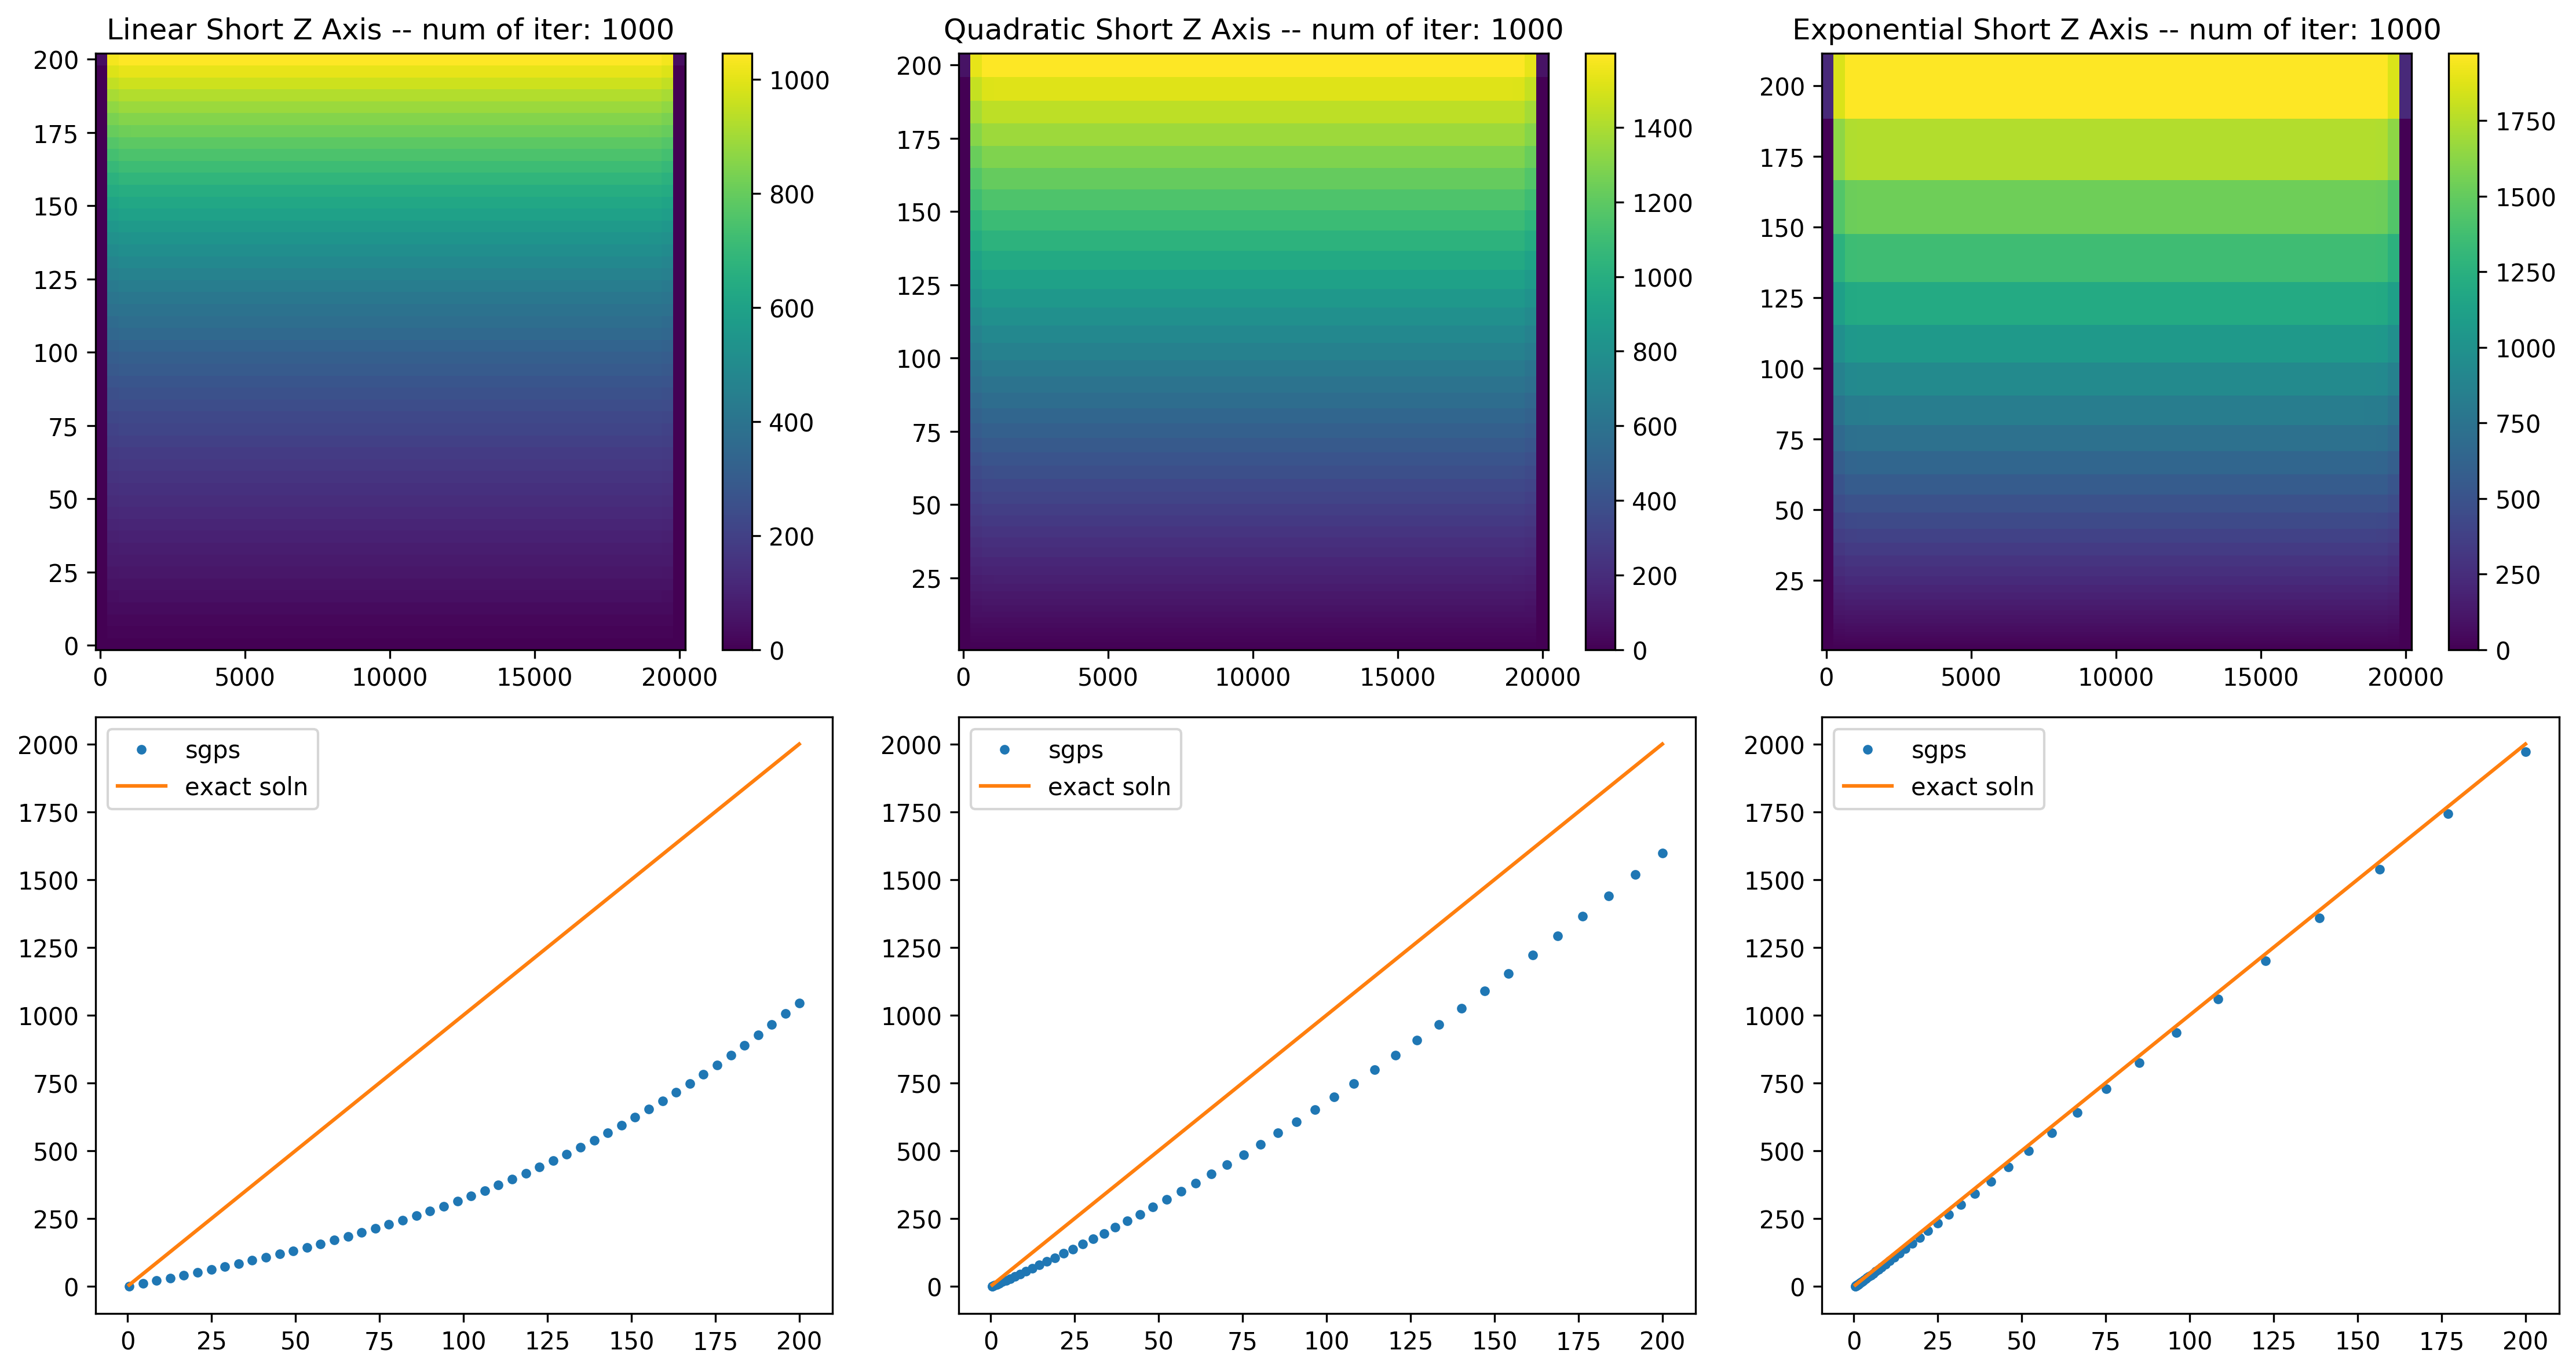

In [12]:
fig = plt.figure(figsize=(15,8),dpi=300)
ax = fig.add_subplot(2,3,1)
im = ax.pcolormesh(sgpsLin.yEdge,sgpsLin.zEdge,np.transpose(sgpsLin.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Linear Short Z Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,4)
ax.plot(sgpsLin.z,sgpsLin.soln[np.int(nLong/2),np.int(nLong/2),:],'.')
ax.plot(sgpsLin.z,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,2)
im = ax.pcolormesh(sgpsQuad.yEdge,sgpsQuad.zEdge,np.transpose(sgpsQuad.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Quadratic Short Z Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,5)
ax.plot(sgpsQuad.z,sgpsQuad.soln[np.int(nLong/2),np.int(nLong/2),:],'.')
ax.plot(sgpsLin.z,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,3)
im = ax.pcolormesh(sgpsExp.yEdge,sgpsExp.zEdge,np.transpose(sgpsExp.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Exponential Short Z Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,6)
ax.plot(sgpsExp.z,sgpsExp.soln[np.int(nLong/2),np.int(nLong/2),:],'.')
ax.plot(sgpsLin.z,exactSoln)
ax.legend(["sgps","exact soln"])

plt.tight_layout()

fig.savefig(filename)

### Short y

In [13]:
# Parallel plate problem with the y axis being the
# "short" axis
# Linear grid on long axes

basePath = "./output/upperNeumann/"
baseName = "parPlates_{1}_{0}Iter".format(numOfIt,"shortY")
debugName = "debug_"+baseName

filename = basePath+baseName+".png"

if not os.path.exists(basePath+debugName+"/"):
    os.makedirs(basePath+debugName+"/")

dbFileName = basePath+debugName+"/"+debugName+".npz"
print(filename)
print(dbFileName)

slope = 10

phi = np.zeros((nLong,nShort,nLong))
f = phi.copy()
neumannCond = lambda x,y,z,phi,f : slope

exactSoln = slope*(lin)

sgpsLin = StretchedGridPoisson(longLin,lin,longLin,phi,f)
sgpsLin.setNeumann(neumannCond,"back")
sgpsLin.solvePoisson(numOfIt)

sgpsQuad = StretchedGridPoisson(longLin,quad,longLin,phi,f)
sgpsQuad.setNeumann(neumannCond,"back")
sgpsQuad.solvePoisson(numOfIt)

sgpsExp = StretchedGridPoisson(longLin,exp,longLin,phi,f)
sgpsExp.setNeumann(neumannCond,"back")
sgpsExp.solvePoisson(numOfIt)

./output/upperNeumann/parPlates_shortY_1000Iter.png
./output/upperNeumann/debug_parPlates_shortY_1000Iter/debug_parPlates_shortY_1000Iter.npz
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 


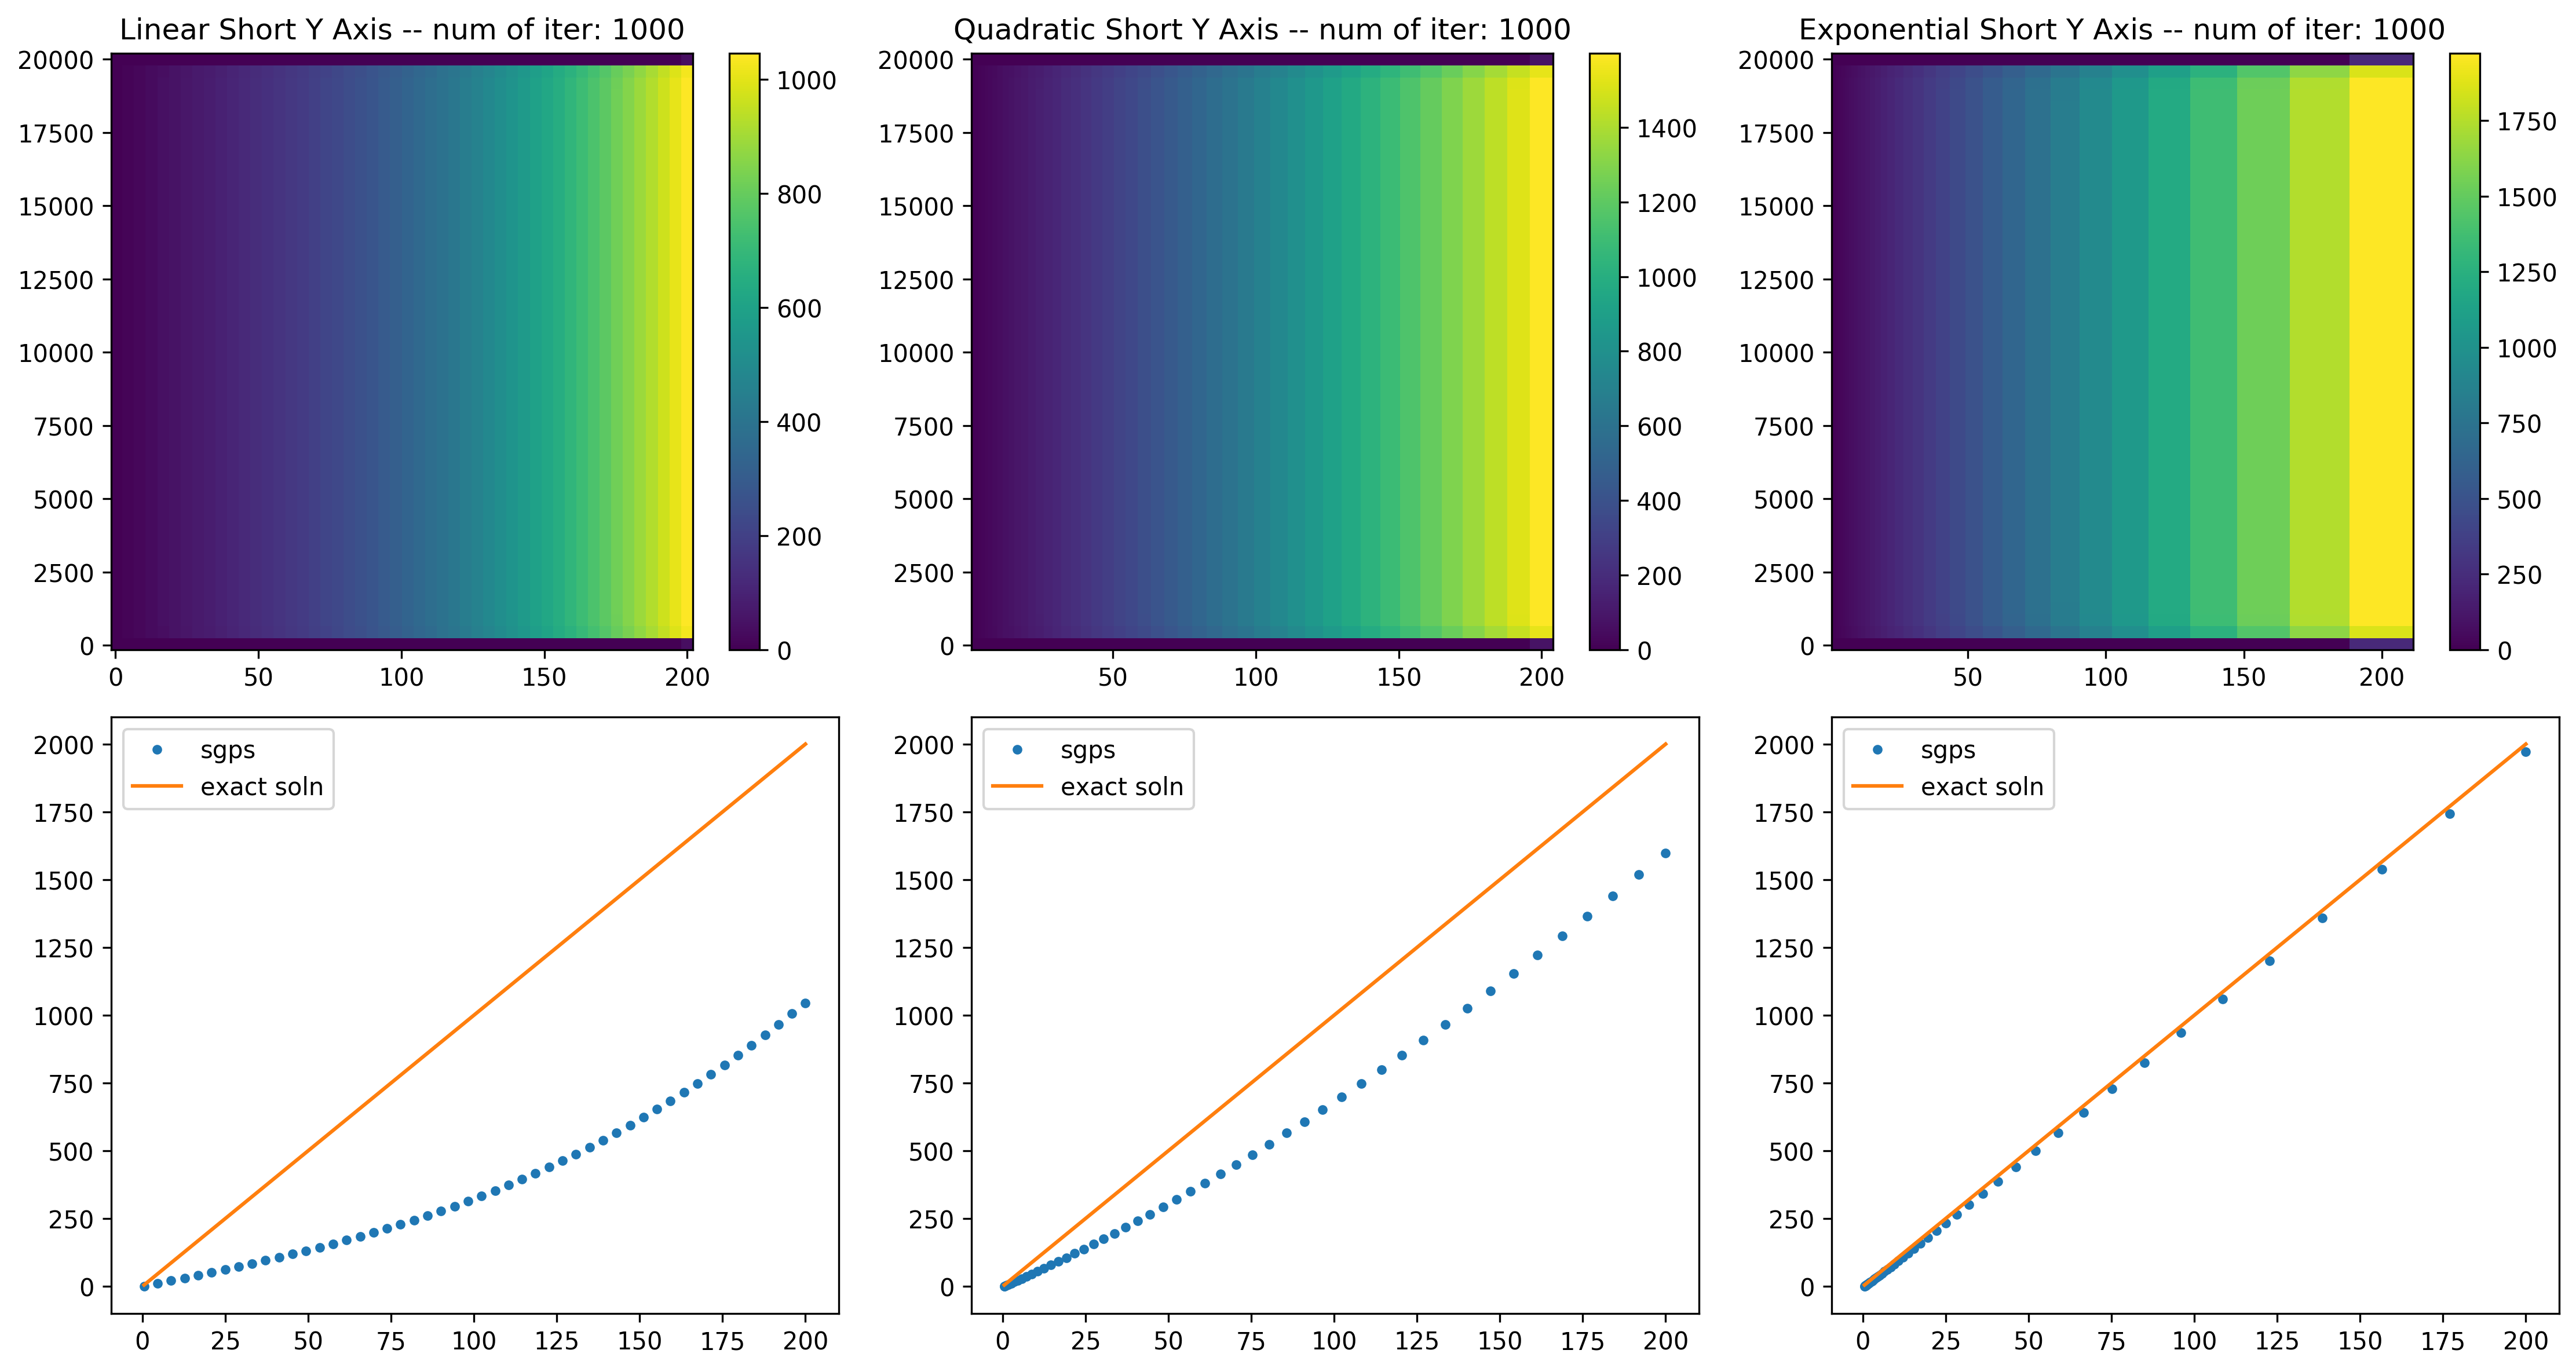

In [14]:
fig = plt.figure(figsize=(15,8),dpi=300)
ax = fig.add_subplot(2,3,1)
im = ax.pcolormesh(sgpsLin.yEdge,sgpsLin.zEdge,np.transpose(sgpsLin.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Linear Short Y Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,4)
ax.plot(sgpsLin.y,sgpsLin.soln[np.int(nLong/2),:,np.int(nLong/2)],'.')
ax.plot(sgpsLin.y,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,2)
im = ax.pcolormesh(sgpsQuad.yEdge,sgpsQuad.zEdge,np.transpose(sgpsQuad.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Quadratic Short Y Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,5)
ax.plot(sgpsQuad.y,sgpsQuad.soln[np.int(nLong/2),:,np.int(nLong/2)],'.')
ax.plot(sgpsLin.y,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,3)
im = ax.pcolormesh(sgpsExp.yEdge,sgpsExp.zEdge,np.transpose(sgpsExp.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Exponential Short Y Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,6)
ax.plot(sgpsExp.y,sgpsExp.soln[np.int(nLong/2),:,np.int(nLong/2)],'.')
ax.plot(sgpsLin.y,exactSoln)
ax.legend(["sgps","exact soln"])

plt.tight_layout()

fig.savefig(filename)

### Short x

In [15]:
# Parallel plate problem with the x axis being the
# "short" axis
# Linear grid on long axes

basePath = "./output/upperNeumann/"
baseName = "parPlates_{1}_{0}Iter".format(numOfIt,"shortX")
debugName = "debug_"+baseName

filename = basePath+baseName+".png"

if not os.path.exists(basePath+debugName+"/"):
    os.makedirs(basePath+debugName+"/")

dbFileName = basePath+debugName+"/"+debugName+".npz"
print(filename)
print(dbFileName)

slope = 10

phi = np.zeros((nShort,nLong,nLong))
f = phi.copy()

lowerDirichlet = -2000*np.ones((nLong,nLong))

neumannCond = lambda x,y,z,phi,f : slope

exactSoln = slope*(lin)

sgpsLin = StretchedGridPoisson(lin,longLin,longLin,phi,f)
sgpsLin.setNeumann(neumannCond,"right")
sgpsLin.solvePoisson(numOfIt)

sgpsQuad = StretchedGridPoisson(quad,longLin,longLin,phi,f)
sgpsQuad.setNeumann(neumannCond,"right")
sgpsQuad.solvePoisson(numOfIt)

sgpsExp = StretchedGridPoisson(exp,longLin,longLin,phi,f)
sgpsExp.setNeumann(neumannCond,"right")
sgpsExp.solvePoisson(numOfIt)

./output/upperNeumann/parPlates_shortX_1000Iter.png
./output/upperNeumann/debug_parPlates_shortX_1000Iter/debug_parPlates_shortX_1000Iter.npz
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 


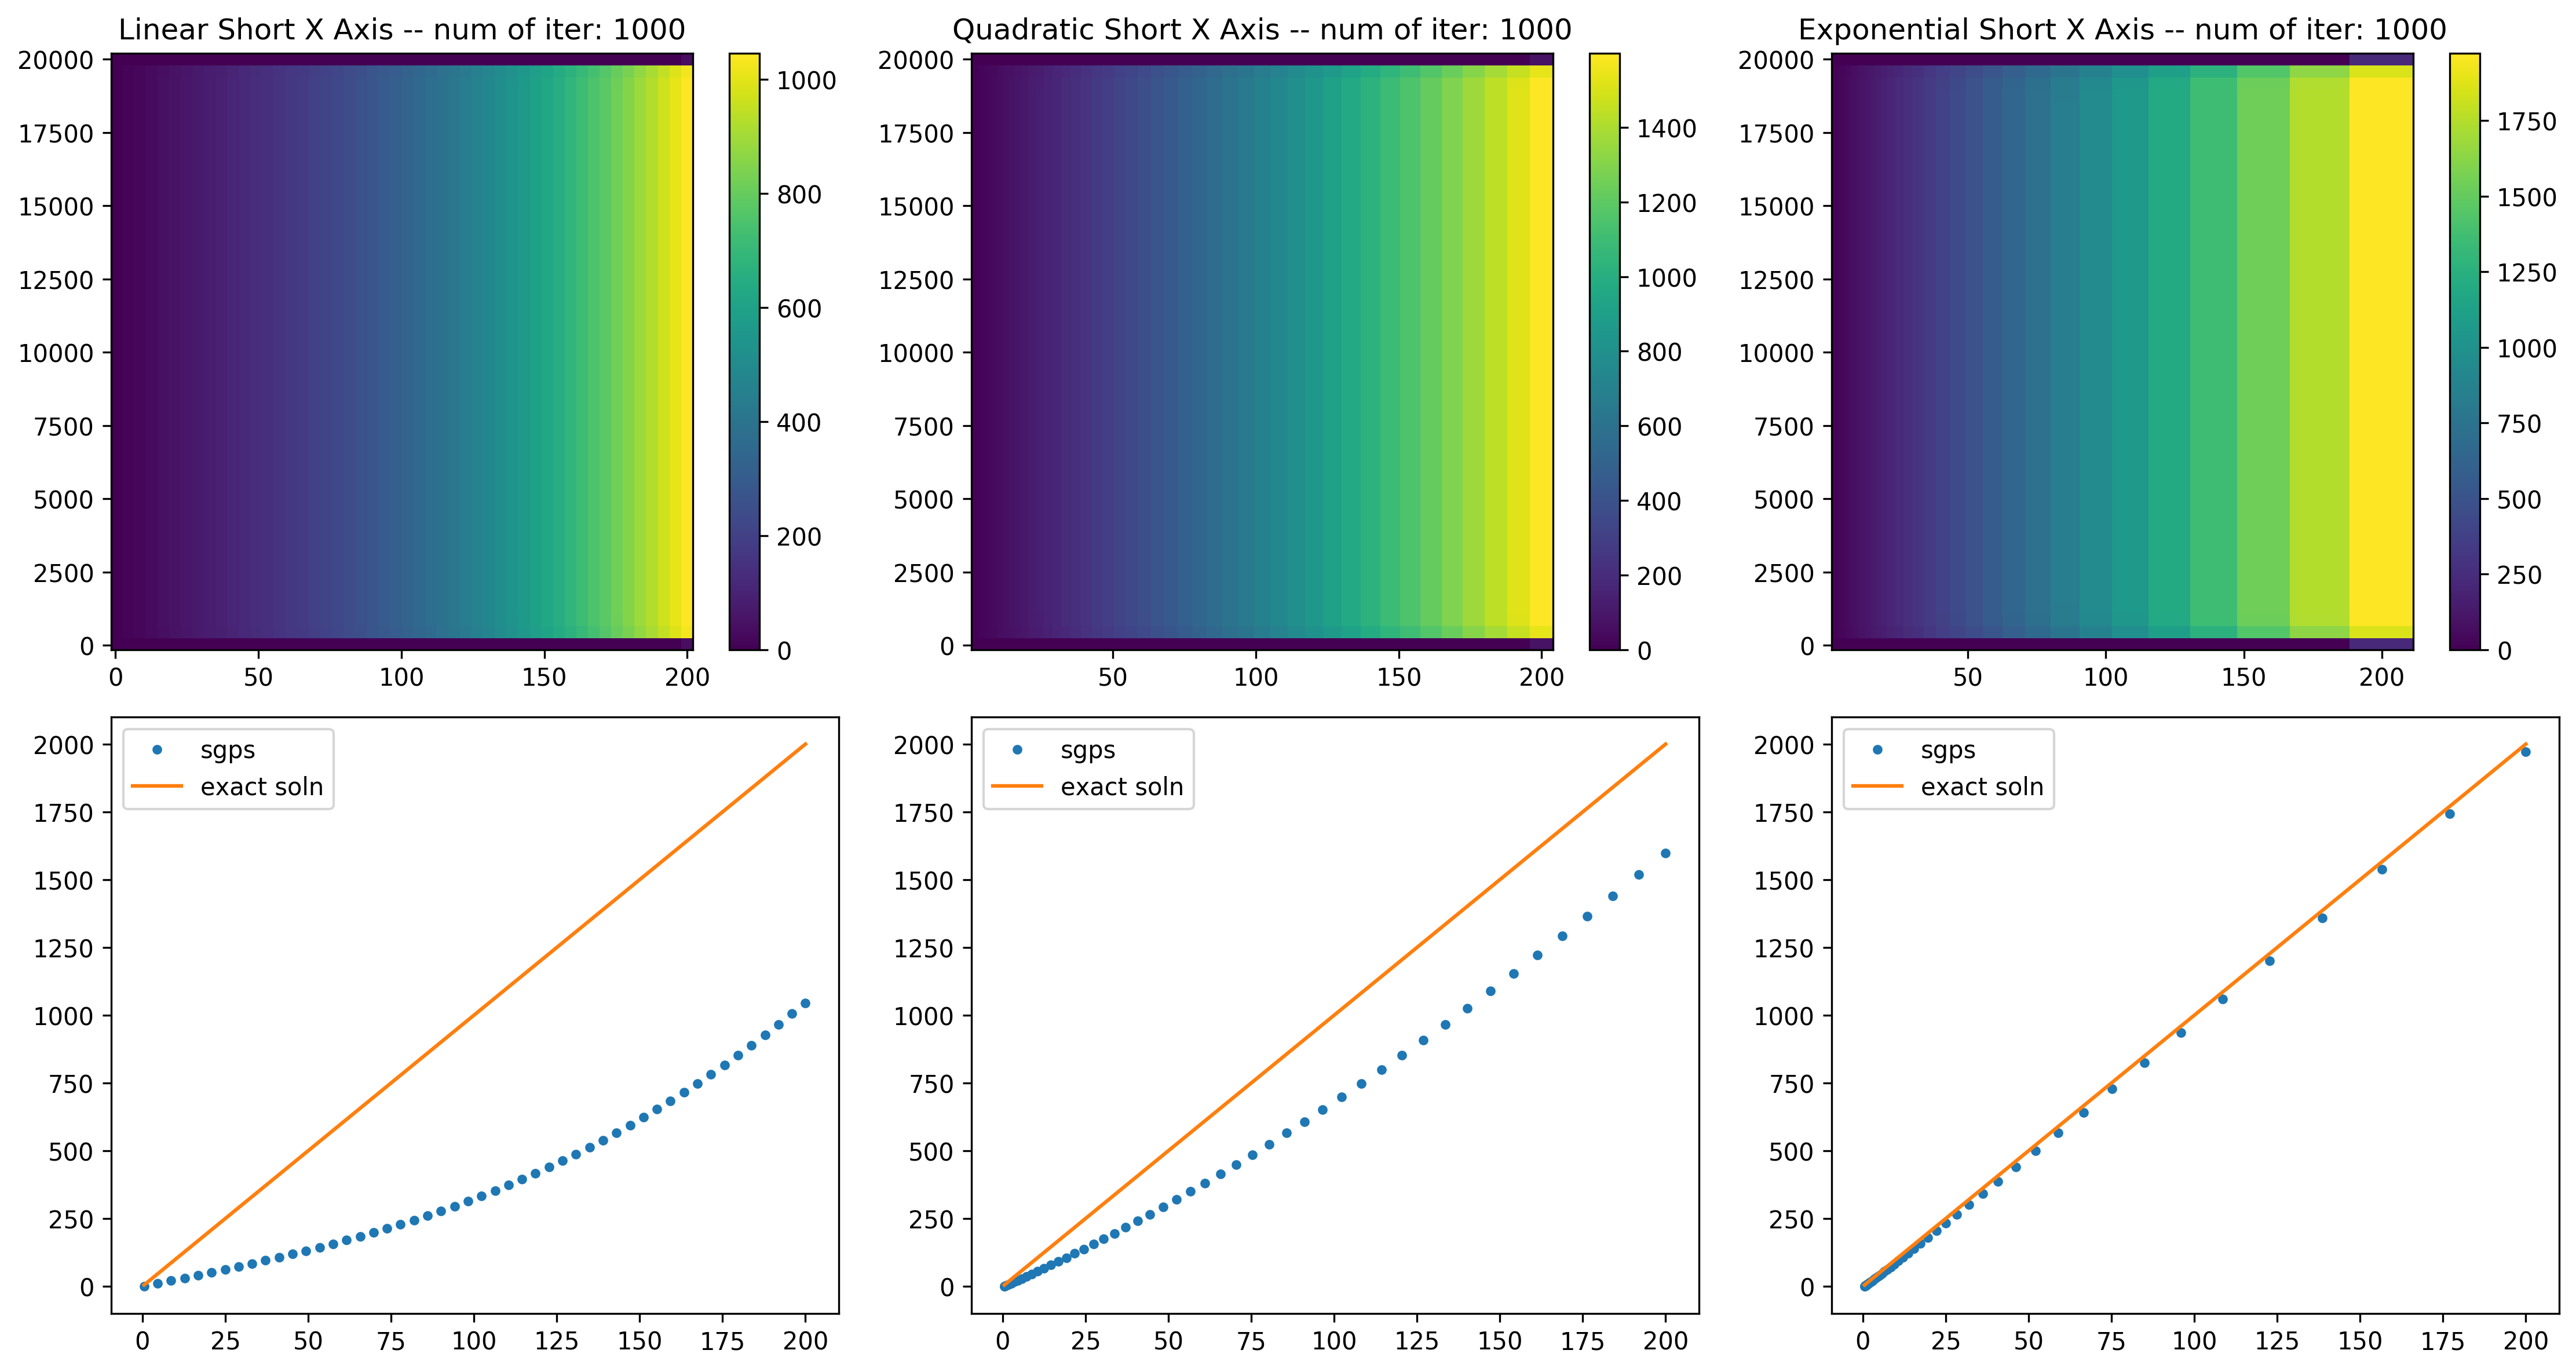

In [16]:
fig = plt.figure(figsize=(15,8),dpi=300)
ax = fig.add_subplot(2,3,1)
im = ax.pcolormesh(sgpsLin.xEdge,sgpsLin.zEdge,np.transpose(sgpsLin.soln[:,np.int(nLong/2),:]))
cb = plt.colorbar(im)
ax.set_title("Linear Short X Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,4)
ax.plot(sgpsLin.x,sgpsLin.soln[:,np.int(nLong/2),np.int(nLong/2)],'.')
ax.plot(sgpsLin.x,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,2)
im = ax.pcolormesh(sgpsQuad.xEdge,sgpsQuad.zEdge,np.transpose(sgpsQuad.soln[:,np.int(nLong/2),:]))
cb = plt.colorbar(im)
ax.set_title("Quadratic Short X Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,5)
ax.plot(sgpsQuad.x,sgpsQuad.soln[:,np.int(nLong/2),np.int(nLong/2)],'.')
ax.plot(sgpsLin.x,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,3)
im = ax.pcolormesh(sgpsExp.xEdge,sgpsExp.zEdge,np.transpose(sgpsExp.soln[:,np.int(nLong/2),:]))
cb = plt.colorbar(im)
ax.set_title("Exponential Short X Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,6)
ax.plot(sgpsExp.x,sgpsExp.soln[:,np.int(nLong/2),np.int(nLong/2)],'.')
ax.plot(sgpsLin.x,exactSoln)
ax.legend(["sgps","exact soln"])

plt.tight_layout()

fig.savefig(filename)

# Test "Lower" Neumann Conditions

### Short z

In [17]:
# Parallel plate problem with the z axis being the
# "short" axis
# Linear grid on long axes

basePath = "./output/lowerNeumann/"
baseName = "parPlates_{1}_{0}Iter".format(numOfIt,"shortZ")
debugName = "debug_"+baseName

filename = basePath+baseName+".png"

if not os.path.exists(basePath+debugName+"/"):
    os.makedirs(basePath+debugName+"/")

dbFileName = basePath+debugName+"/"+debugName+".npz"
print(filename)
print(dbFileName)

slope = 10

phi = np.zeros((nLong,nLong,nShort))
f = phi.copy()
neumannCond = lambda x,y,z,phi,f : slope

exactSoln = slope*(lin-delShort)

sgpsLin = StretchedGridPoisson(longLin,longLin,lin,phi,f)
sgpsLin.setNeumann(neumannCond,"bottom")
sgpsLin.solvePoisson(numOfIt)

sgpsQuad = StretchedGridPoisson(longLin,longLin,quad,phi,f)
sgpsQuad.setNeumann(neumannCond,"bottom")
sgpsQuad.solvePoisson(numOfIt)

sgpsExp = StretchedGridPoisson(longLin,longLin,exp,phi,f)
sgpsExp.setNeumann(neumannCond,"bottom")
sgpsExp.solvePoisson(numOfIt)

./output/lowerNeumann/parPlates_shortZ_1000Iter.png
./output/lowerNeumann/debug_parPlates_shortZ_1000Iter/debug_parPlates_shortZ_1000Iter.npz
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 


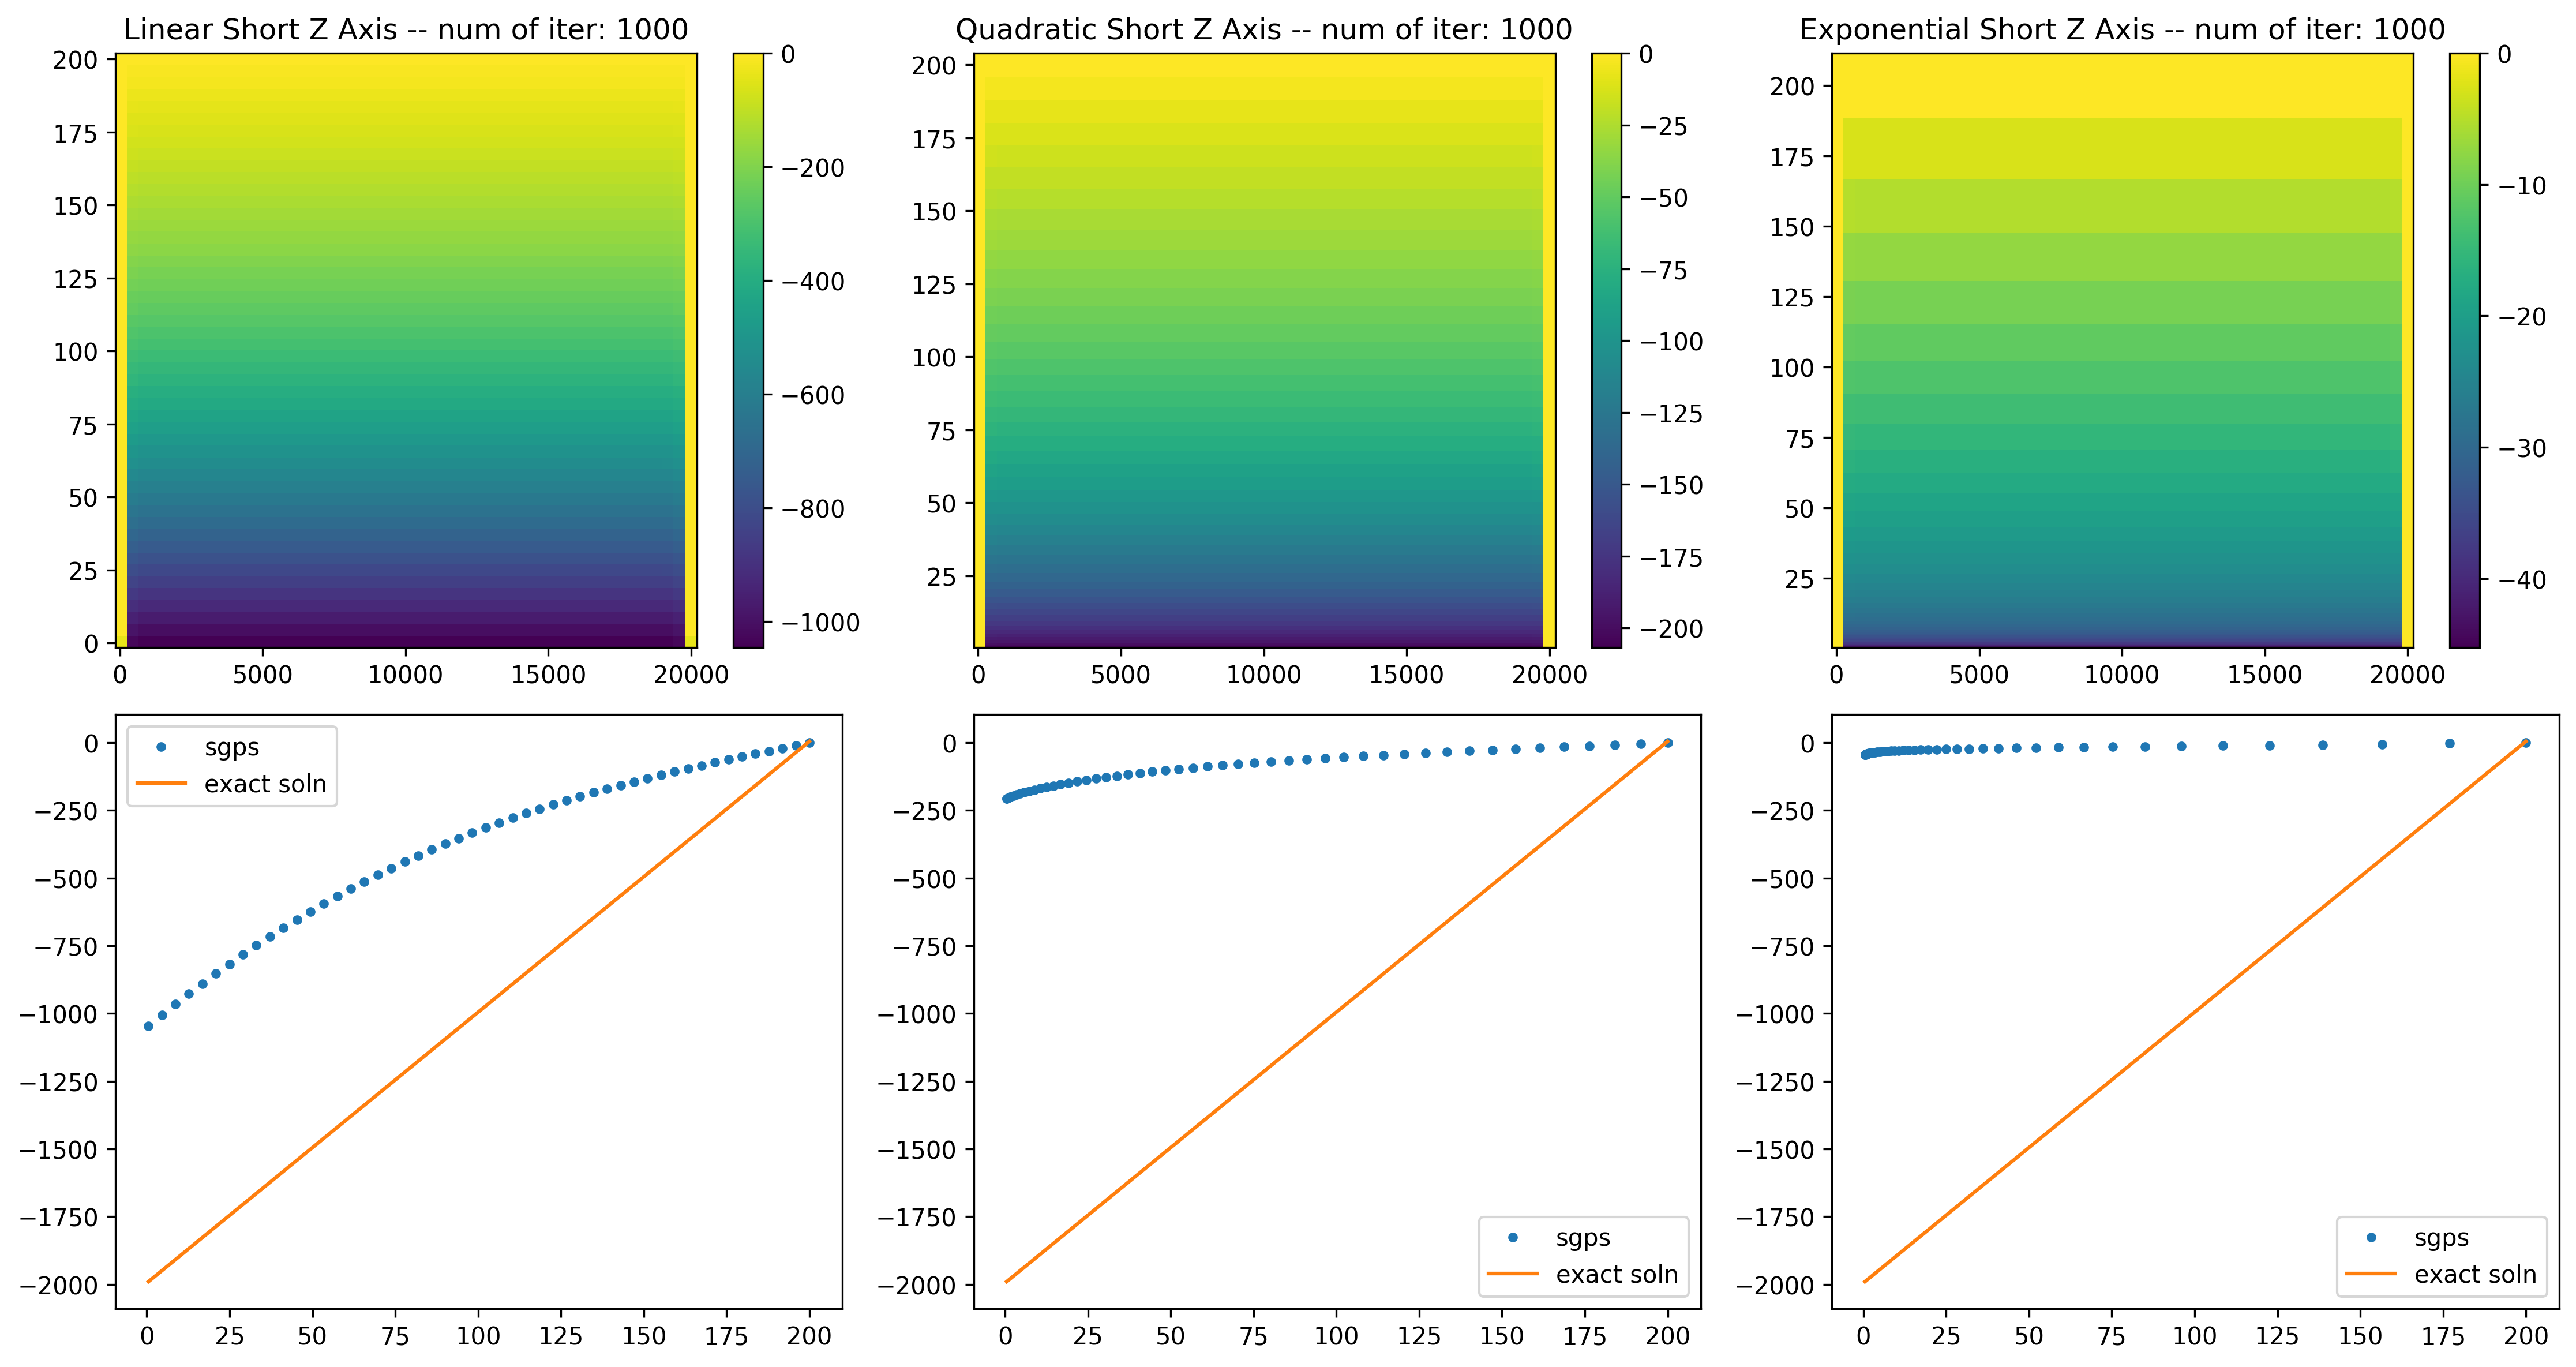

In [18]:
fig = plt.figure(figsize=(15,8),dpi=300)
ax = fig.add_subplot(2,3,1)
im = ax.pcolormesh(sgpsLin.yEdge,sgpsLin.zEdge,np.transpose(sgpsLin.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Linear Short Z Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,4)
ax.plot(sgpsLin.z,sgpsLin.soln[np.int(nLong/2),np.int(nLong/2),:],'.')
ax.plot(sgpsLin.z,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,2)
im = ax.pcolormesh(sgpsQuad.yEdge,sgpsQuad.zEdge,np.transpose(sgpsQuad.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Quadratic Short Z Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,5)
ax.plot(sgpsQuad.z,sgpsQuad.soln[np.int(nLong/2),np.int(nLong/2),:],'.')
ax.plot(sgpsLin.z,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,3)
im = ax.pcolormesh(sgpsExp.yEdge,sgpsExp.zEdge,np.transpose(sgpsExp.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Exponential Short Z Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,6)
ax.plot(sgpsExp.z,sgpsExp.soln[np.int(nLong/2),np.int(nLong/2),:],'.')
ax.plot(sgpsLin.z,exactSoln)
ax.legend(["sgps","exact soln"])

plt.tight_layout()

fig.savefig(filename)

### Short y

In [56]:
# Parallel plate problem with the y axis being the
# "short" axis
# Linear grid on long axes

basePath = "./output/lowerNeumann/"
baseName = "parPlates_{1}_{0}Iter".format(numOfIt,"shortY")
debugName = "debug_"+baseName

filename = basePath+baseName+".png"
derivFilename = basePath+baseName+"_normalDeriv.png"
derivIndFilename = basePath+baseName+"_normalDeriv_Ind.png"
print(derivFilename)

if not os.path.exists(basePath+debugName+"/"):
    os.makedirs(basePath+debugName+"/")

dbFileName = basePath+debugName+"/"+debugName+".npz"
print(filename)
print(dbFileName)

slope = 10

phi = np.zeros((nLong,nShort,nLong))
f = phi.copy()
neumannCond = lambda x,y,z,phi,f : slope

exactSoln = slope*(lin-delShort)

sgpsLin = StretchedGridPoisson(longLin,lin,longLin,phi,f)
sgpsLin.setNeumann(neumannCond,"forward")
sgpsLin.solvePoisson(numOfIt)

sgpsQuad = StretchedGridPoisson(longLin,quad,longLin,phi,f)
sgpsQuad.setNeumann(neumannCond,"forward")
sgpsQuad.solvePoisson(numOfIt)

sgpsExp = StretchedGridPoisson(longLin,exp,longLin,phi,f)
sgpsExp.setNeumann(neumannCond,"forward")
sgpsExp.solvePoisson(numOfIt)

./output/lowerNeumann/parPlates_shortY_1000Iter_normalDeriv.png
./output/lowerNeumann/parPlates_shortY_1000Iter.png
./output/lowerNeumann/debug_parPlates_shortY_1000Iter/debug_parPlates_shortY_1000Iter.npz
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 


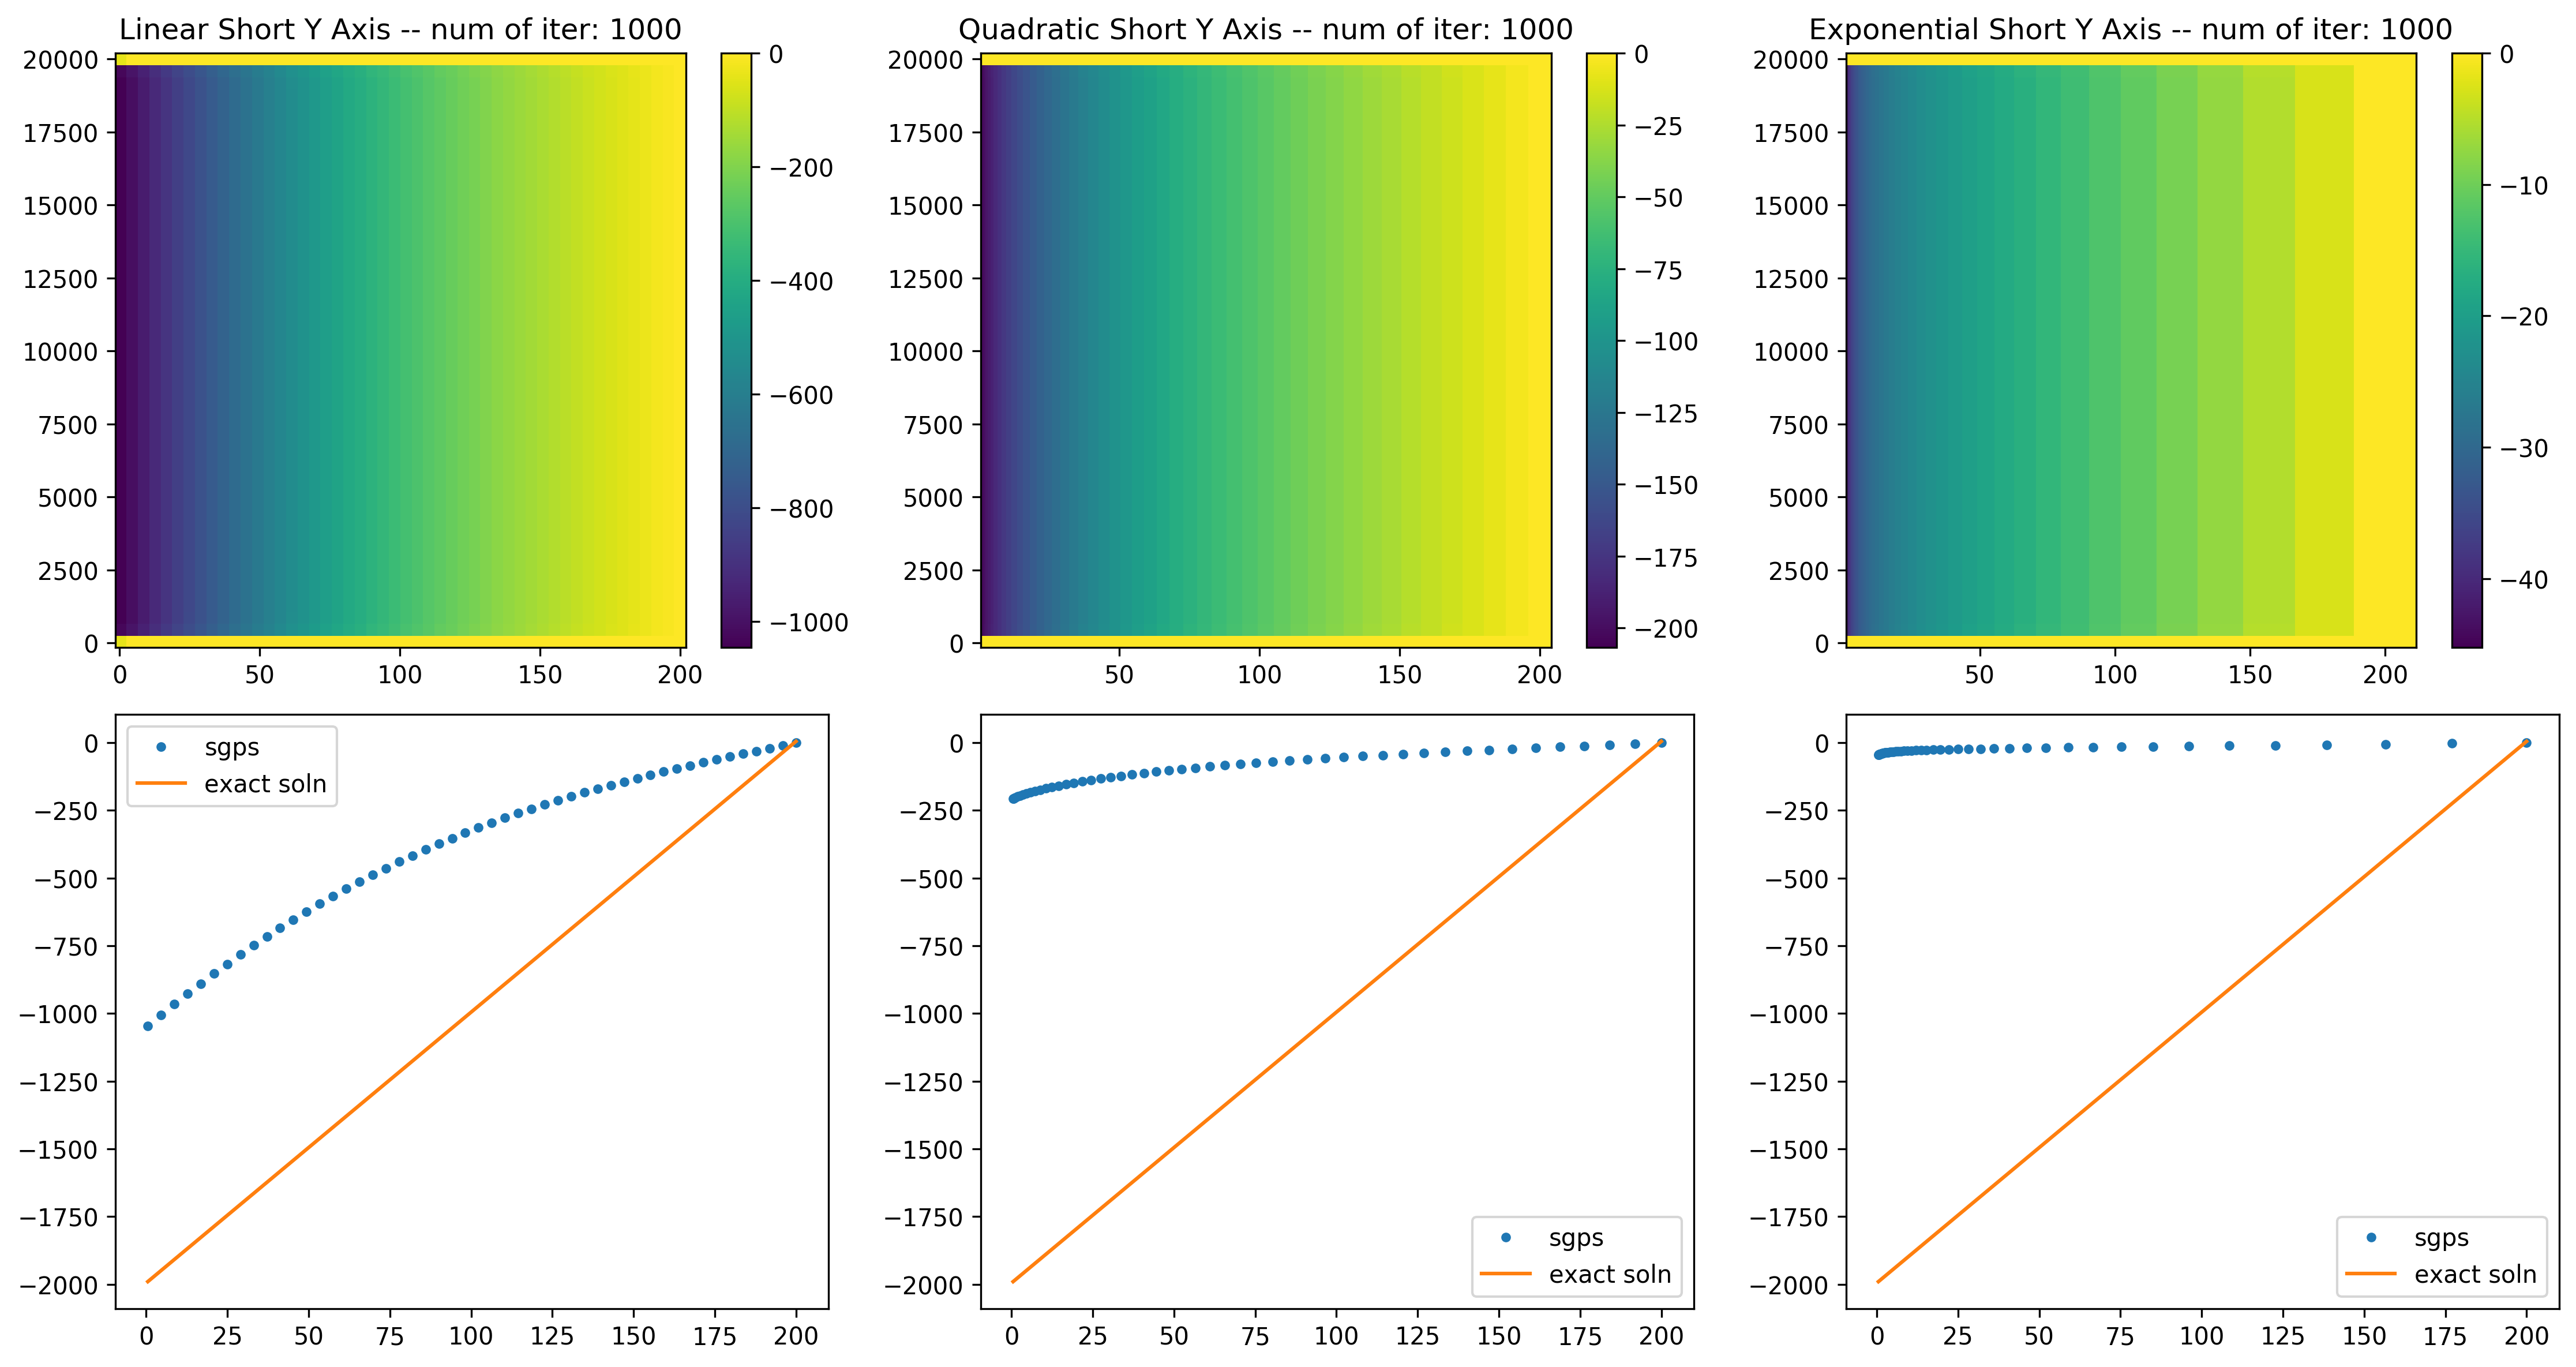

In [57]:
fig = plt.figure(figsize=(15,8),dpi=300)
ax = fig.add_subplot(2,3,1)
im = ax.pcolormesh(sgpsLin.yEdge,sgpsLin.zEdge,np.transpose(sgpsLin.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Linear Short Y Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,4)
ax.plot(sgpsLin.y,sgpsLin.soln[np.int(nLong/2),:,np.int(nLong/2)],'.')
ax.plot(sgpsLin.y,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,2)
im = ax.pcolormesh(sgpsQuad.yEdge,sgpsQuad.zEdge,np.transpose(sgpsQuad.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Quadratic Short Y Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,5)
ax.plot(sgpsQuad.y,sgpsQuad.soln[np.int(nLong/2),:,np.int(nLong/2)],'.')
ax.plot(sgpsLin.y,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,3)
im = ax.pcolormesh(sgpsExp.yEdge,sgpsExp.zEdge,np.transpose(sgpsExp.soln[np.int(nLong/2),:,:]))
cb = plt.colorbar(im)
ax.set_title("Exponential Short Y Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,6)
ax.plot(sgpsExp.y,sgpsExp.soln[np.int(nLong/2),:,np.int(nLong/2)],'.')
ax.plot(sgpsLin.y,exactSoln)
ax.legend(["sgps","exact soln"])

plt.tight_layout()

fig.savefig(filename)

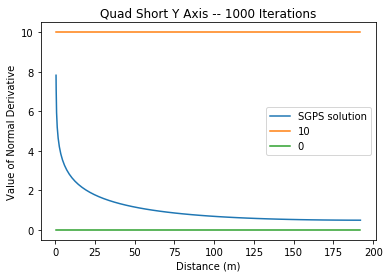

In [58]:
sgpsTest = sgpsQuad
plt.plot(sgpsTest.y[:-1],
         (sgpsTest.soln[np.int(nLong/2),1:,np.int(nLong/2)]-sgpsTest.soln[np.int(nLong/2),:-1,np.int(nLong/2)])/sgpsTest.dY)
plt.plot(sgpsTest.y[:-1],10*np.ones_like(sgpsTest.y[:-1]))
plt.plot(sgpsTest.y[:-1],10*np.zeros_like(sgpsTest.y[:-1]))
plt.title("Quad Short Y Axis -- {} Iterations".format(numOfIt))
plt.xlabel("Distance (m)")
plt.ylabel("Value of Normal Derivative")
plt.legend(["SGPS solution","10","0"])
plt.savefig(derivFilename)

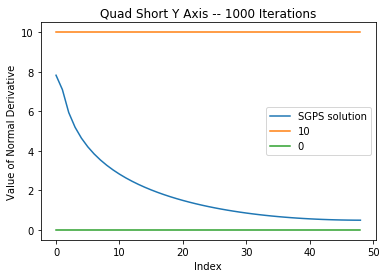

In [59]:
sgpsTest = sgpsQuad
plt.plot((sgpsTest.soln[np.int(nLong/2),1:,np.int(nLong/2)]-sgpsTest.soln[np.int(nLong/2),:-1,np.int(nLong/2)])/sgpsTest.dY)
plt.plot(10*np.ones_like(sgpsTest.y[:-1]))
plt.plot(10*np.zeros_like(sgpsTest.y[:-1]))
plt.title("Quad Short Y Axis -- {} Iterations".format(numOfIt))
plt.xlabel("Index")
plt.ylabel("Value of Normal Derivative")
plt.legend(["SGPS solution","10","0"])
plt.savefig(derivIndFilename)

In [22]:
# Parallel plate problem with the x axis being the
# "short" axis
# Linear grid on long axes

basePath = "./output/lowerNeumann/"
baseName = "parPlates_{1}_{0}Iter".format(numOfIt,"shortX")
debugName = "debug_"+baseName

filename = basePath+baseName+".png"

if not os.path.exists(basePath+debugName+"/"):
    os.makedirs(basePath+debugName+"/")

dbFileName = basePath+debugName+"/"+debugName+".npz"
print(filename)
print(dbFileName)

slope = 10

phi = np.zeros((nShort,nLong,nLong))
f = phi.copy()
neumannCond = lambda x,y,z,phi,f : slope

exactSoln = slope*(lin-delShort)

sgpsLin = StretchedGridPoisson(lin,longLin,longLin,phi,f)
sgpsLin.setNeumann(neumannCond,"left")
sgpsLin.solvePoisson(numOfIt)

sgpsQuad = StretchedGridPoisson(quad,longLin,longLin,phi,f)
sgpsQuad.setNeumann(neumannCond,"left")
sgpsQuad.solvePoisson(numOfIt)

sgpsExp = StretchedGridPoisson(exp,longLin,longLin,phi,f)
sgpsExp.setNeumann(neumannCond,"left")
sgpsExp.solvePoisson(numOfIt)

./output/lowerNeumann/parPlates_shortX_1000Iter.png
./output/lowerNeumann/debug_parPlates_shortX_1000Iter/debug_parPlates_shortX_1000Iter.npz
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 
Iteration: 0, 200, 400, 600, 800, 


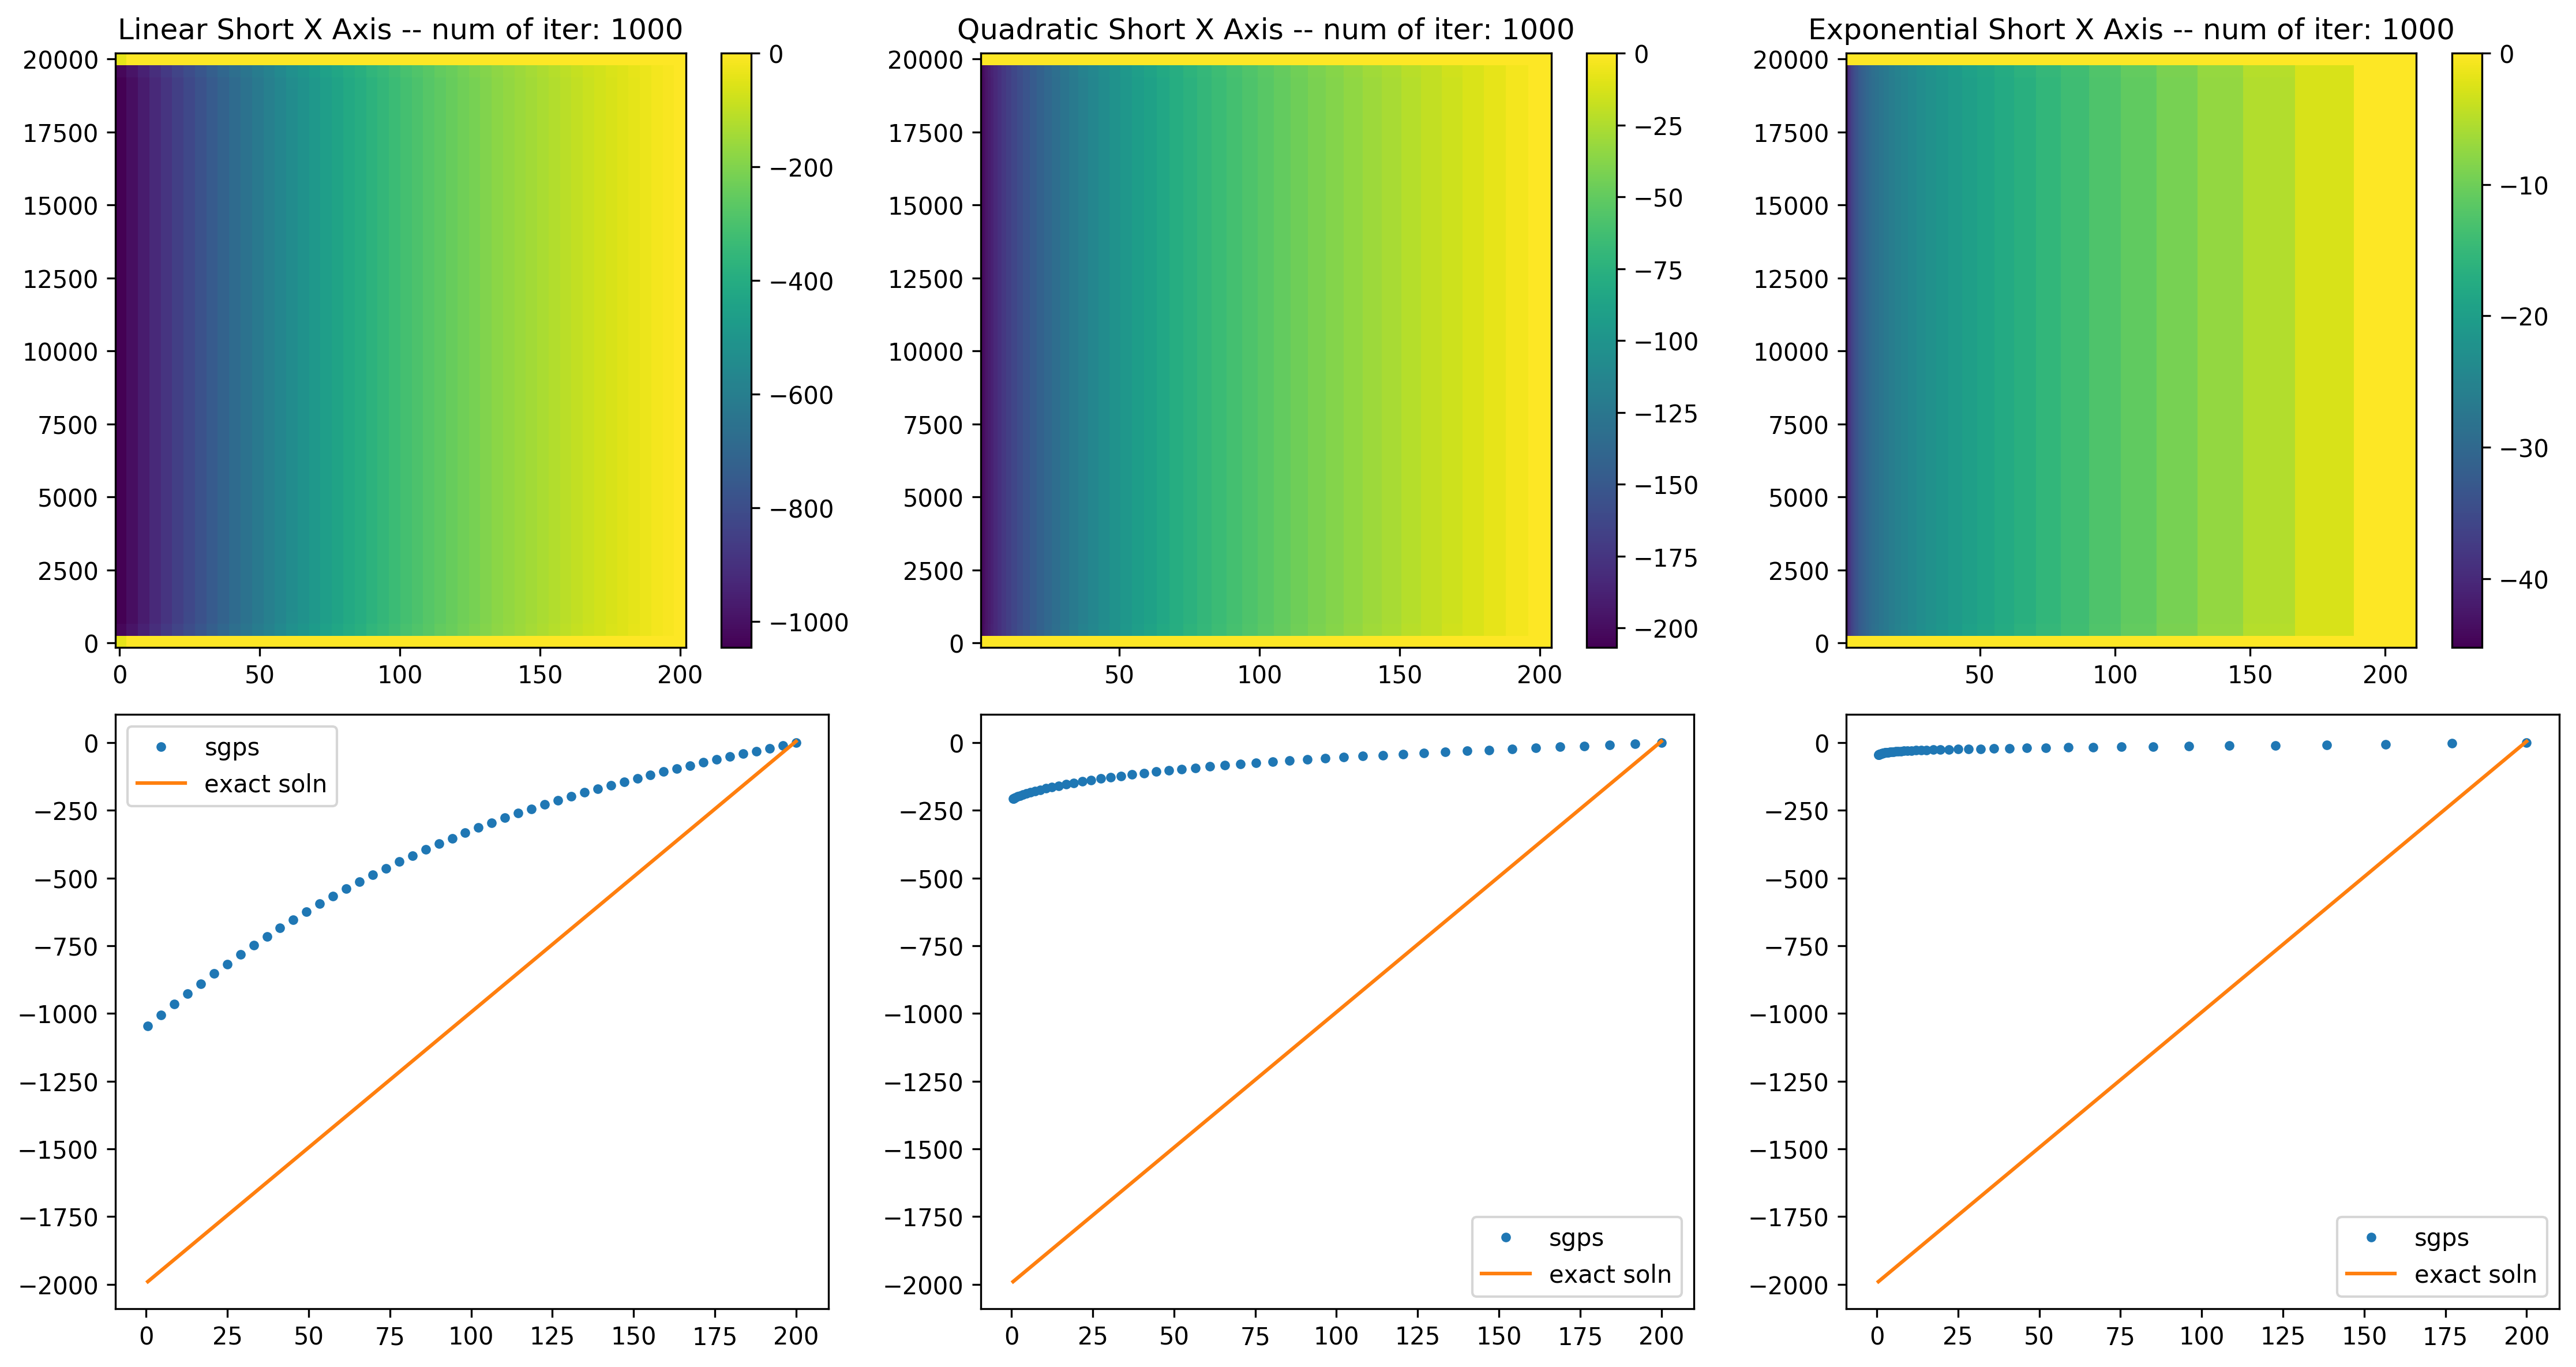

In [23]:
fig = plt.figure(figsize=(15,8),dpi=300)
ax = fig.add_subplot(2,3,1)
im = ax.pcolormesh(sgpsLin.xEdge,sgpsLin.zEdge,np.transpose(sgpsLin.soln[:,np.int(nLong/2),:]))
cb = plt.colorbar(im)
ax.set_title("Linear Short X Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,4)
ax.plot(sgpsLin.x,sgpsLin.soln[:,np.int(nLong/2),np.int(nLong/2)],'.')
ax.plot(sgpsLin.x,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,2)
im = ax.pcolormesh(sgpsQuad.xEdge,sgpsQuad.zEdge,np.transpose(sgpsQuad.soln[:,np.int(nLong/2),:]))
cb = plt.colorbar(im)
ax.set_title("Quadratic Short X Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,5)
ax.plot(sgpsQuad.x,sgpsQuad.soln[:,np.int(nLong/2),np.int(nLong/2)],'.')
ax.plot(sgpsLin.x,exactSoln)
ax.legend(["sgps","exact soln"])

ax = fig.add_subplot(2,3,3)
im = ax.pcolormesh(sgpsExp.xEdge,sgpsExp.zEdge,np.transpose(sgpsExp.soln[:,np.int(nLong/2),:]))
cb = plt.colorbar(im)
ax.set_title("Exponential Short X Axis -- " + "num of iter: %s" % numOfIt)
ax = fig.add_subplot(2,3,6)
ax.plot(sgpsExp.x,sgpsExp.soln[:,np.int(nLong/2),np.int(nLong/2)],'.')
ax.plot(sgpsLin.x,exactSoln)
ax.legend(["sgps","exact soln"])

plt.tight_layout()

fig.savefig(filename)